In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D

import xspec as x
#import os

#%matplotlib notebook

#import sys
#sys.stdout = open('/dev/stdout', 'w')
#sys.stderr = open('/dev/stderr', 'w')

#%load_ext autoreload
#%autoreload 1

In [2]:
x.Xset.chatter = 0
#x.Xset.logChatter = 25
logFile = x.Xset.openLog("newLogFile.txt")

# 1. LINES ONLY

В этом блоке представлен алгоритм для вычисления $T_{spec}$ по спектрам (с преобладанием линий) двухкомпонентной плазмы разными способами и отображения его как на Рис.3 из публикации Вихлинина.

## 1.1 $T_{spec}$ from E(T)

In [8]:
%run -i 'utils/ave_lines.py'

Построим графики зависимости средних энергий от температуры для различных спектров и телескопов. Эти зависимости получены в результате выполнения скрипта `stats.sh`.

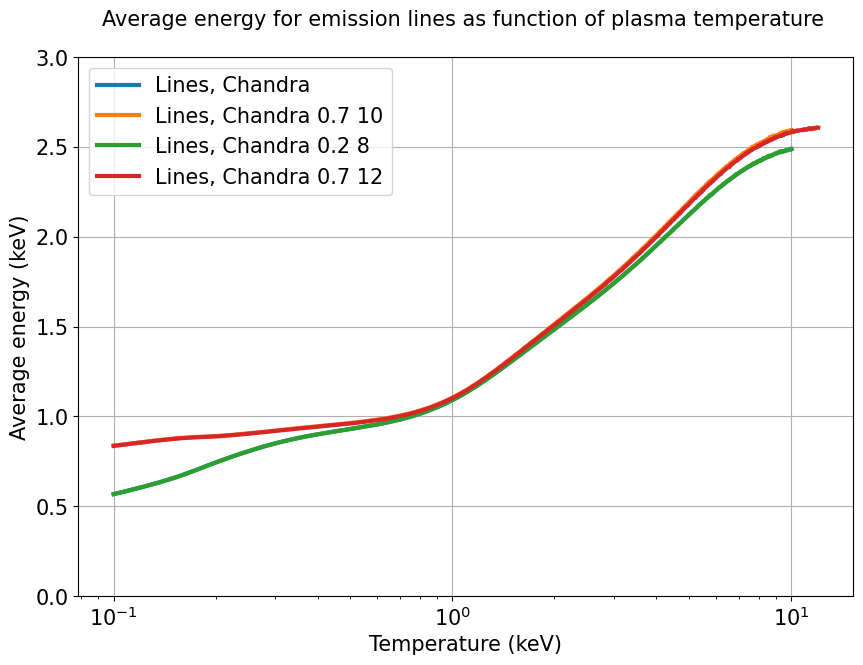

In [167]:
plt.figure(figsize=(10,7))

data_name1 = "data_stats/stats_03.dat"   #'Lines, CH'
data_name2 = "data_stats/stats_11.dat"   #'Cont, CH'
data_name3 = "data_stats/stats_10.dat"   #'Lines, ER'
data_name4 = "data_stats/stats_13.dat"   #'Cont, ER'
data_name5 = "data_stats/stats_07.dat"   #'Lines, ER'
data_name6 = "data_stats/stats_12.dat"   #'Lines, ER'
data_name7 = "stats444.dat"
data_name8 = "stats.dat"
data_name9 = "stats449.dat"

plot_E_T(data_name1, 'Lines', 'Chandra')
#plot_E_T(data_name2, 'Continuum', 'Chandra')
#plot_E_T(data_name3, 'Lines', 'SRG/eROSITA')
#plot_E_T(data_name4, 'Continuum', 'SRG/eROSITA')
#plot_E_T(data_name6, 'Line2', 'er')
plot_E_T(data_name7, 'Lines', 'Chandra 0.7 10')
plot_E_T(data_name8, 'Lines', 'Chandra 0.2 8')
plot_E_T(data_name9, 'Lines', 'Chandra 0.7 12')
  
#plt.xscale('linear')
#add_T(1.0, 3.0, data_name1)

# comment if there is only one E(T)
# this move deletes unique titles
plt.title('Average energy for emission lines as function of plasma temperature \n', fontsize=15)
plt.grid()
#plt.savefig('letter26.10/Fig2.png')
plt.show()

## 1.2 $T_{spec}$ for lines from direct fit

Drawing routine. Also performs `fakeit` and `steppar`.

In [4]:
%run -i 'utils/fit_main.py'

## PyXspec

Defining a function that calculates single-temperature fit for two-component plasma (with line-dominated spectra) of temperatures $T_{min}$ and $T_{max}$ and relative contributions $f_{min}$ and $f_{max}$ respectively.

Note: to get rid of trace elements for pure bremsstrahlung use `xset APEC_TRACE_ABUND 0`.

<Figure size 640x480 with 0 Axes>

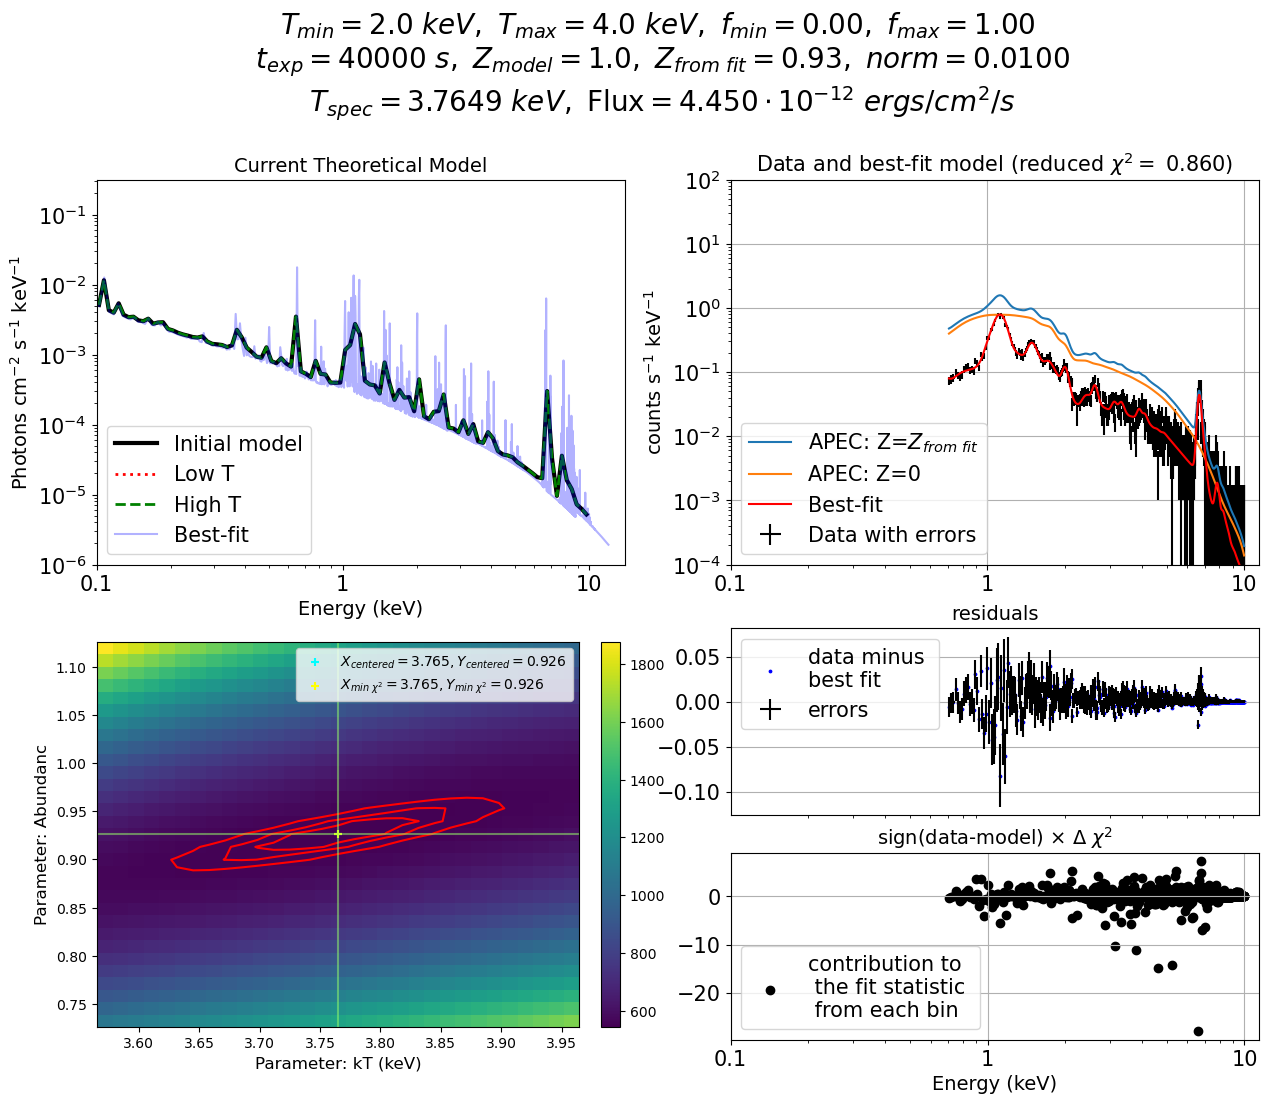

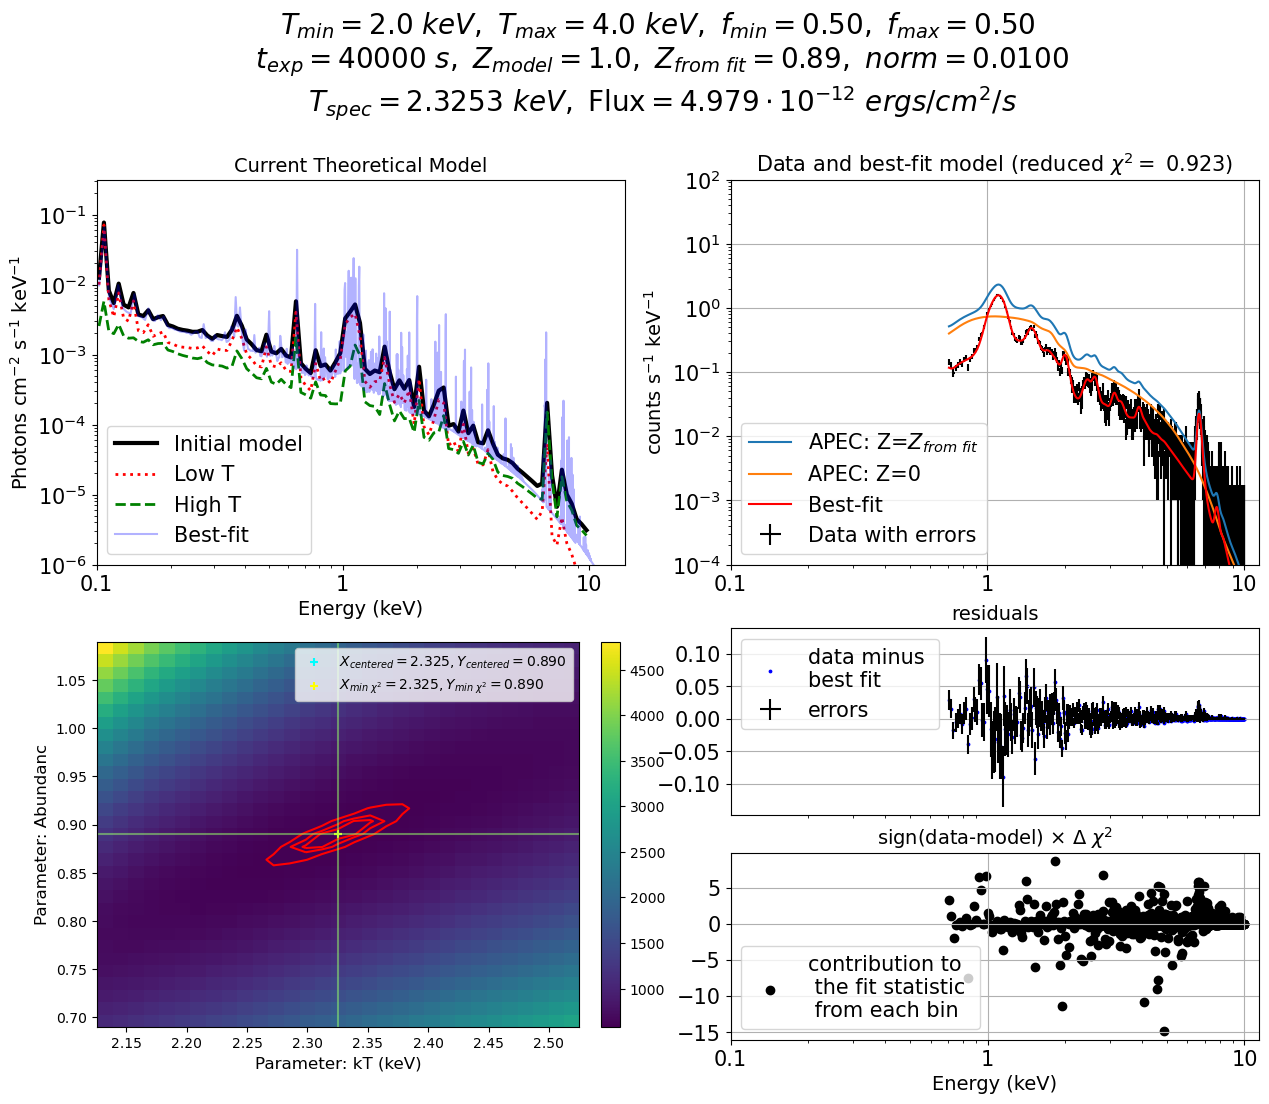

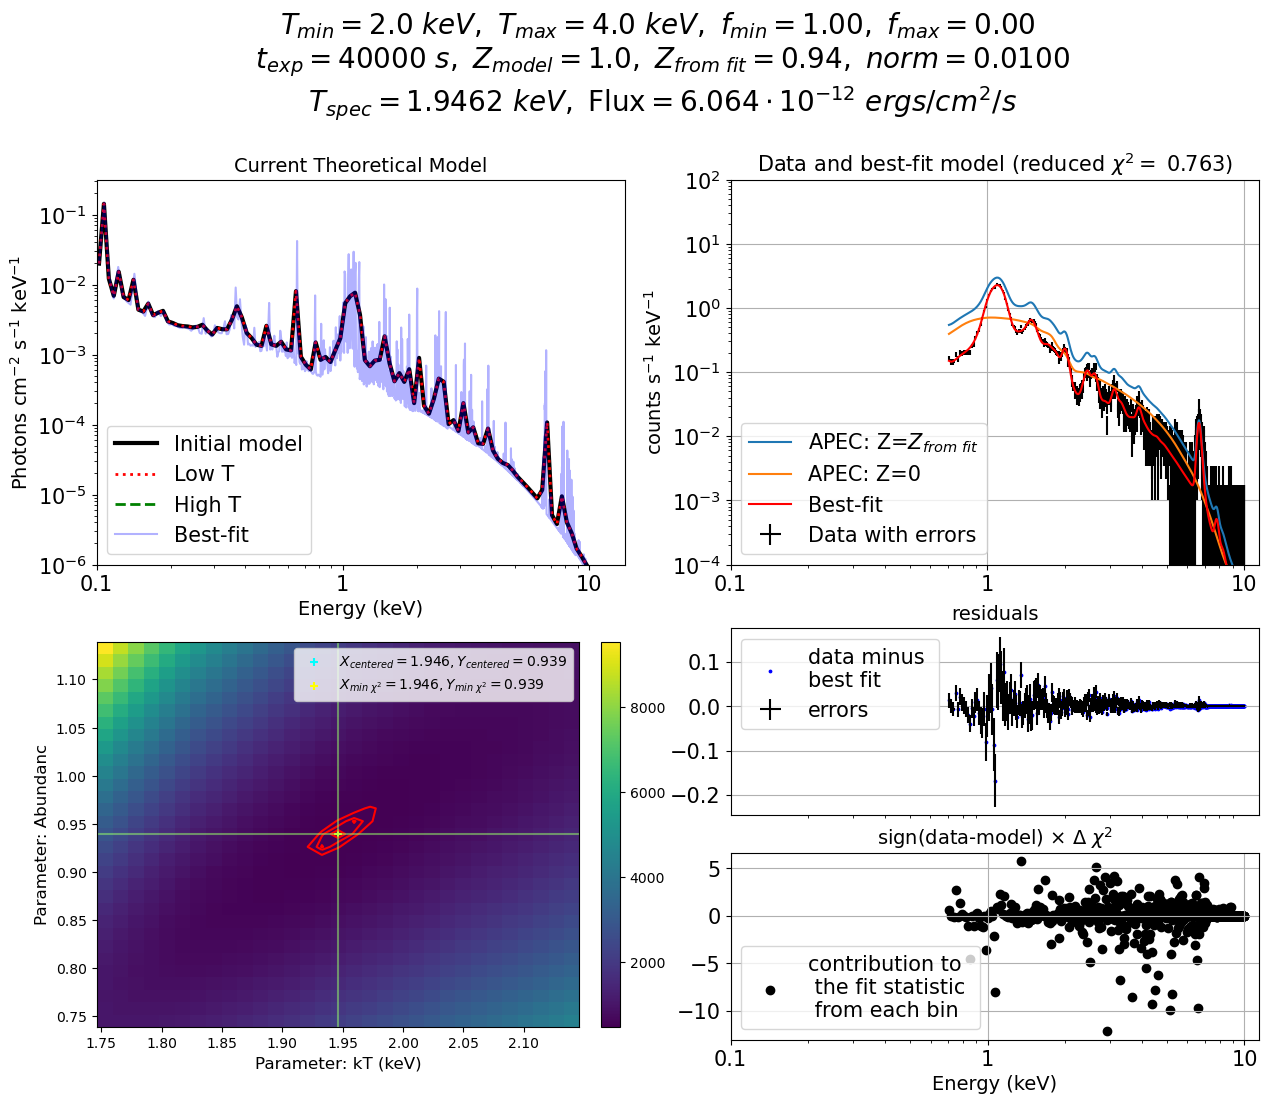

T:  [3.7648637997408083, 2.3253159647446973, 1.9461577204246987]
F:  [4.449501795168522e-12, 4.978860182771024e-12, 6.064028129567241e-12]
[]


In [20]:
logFile = x.Xset.openLog("newLogFile.txt")

%run -i 'utils/fit_lines.py'

fitlisttttt, fluxxxx, dt1, dt2 = single_T_fit_lines(2.0, 4.0, 3, 1.0, 
                                                    'Chandra/ACIS-OLD', 
                                                    nrm=0.01, 
                                                    texp=40000, 
                                                    stpar=True, 
                                                    plot=True, 
                                                    Xplot=False)
print("T: ", fitlisttttt)
print("F: ", fluxxxx)
print([(a, b) for a, b in zip(dt1, dt2)])

In [30]:
%run -i 'utils/tspec_norm.py'

temps, temps_spec, temps_diff, dts = calc_Tspec_norm(N_temps=10, 
                                                     T_low=1.0, 
                                                     T_high=8.0, 
                                                     norms=(1, 0.1, 0.01), 
                                                     mode='lines', 
                                                     tlscp='Chandra/ACIS-OLD')

<Figure size 640x480 with 0 Axes>

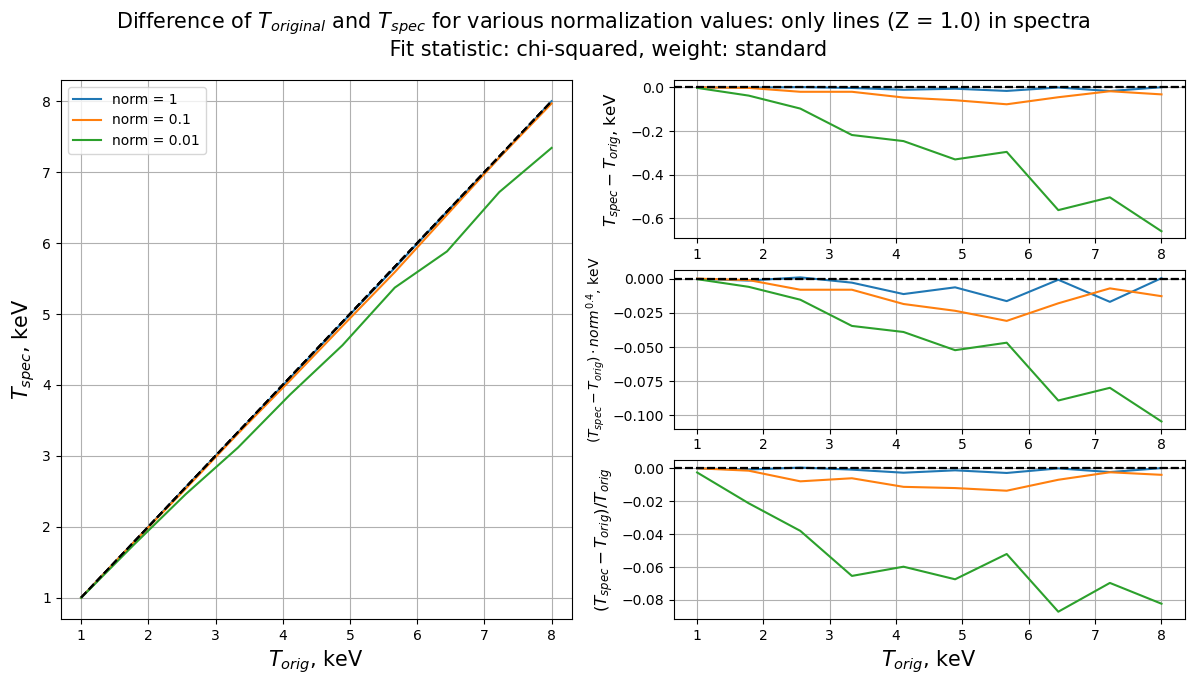

In [22]:
draw_Tspec_norm(temps, temps_spec, temps_diff, dts, 
                mode='only lines (Z = 1.0) in spectra \n Fit statistic: chi-squared, weight: standard')

## Замечания и дополнения:

1) `churazov` weights - для слабых источников

2) [statistic](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node119.html), [steppar](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node86.html), [error](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node79.html), [error codes](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node60.html#tclouterror)

3) Калибровка через `cflux`

4) Добавить возможность менять $n_H$

5) Научиться добавлять фон: `background`

6) [Appendix B: Statistics in XSPEC](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node319.html#AppendixStatistics)

## 1.3 Figure 3

Reading from file (obsolete):

`fitlist = pd.read_csv("tspec_list.dat", header=None)[0].to_numpy().astype(float)`

`plt.scatter(np.linspace(0, 1, len(fitlist)), fitlist)`

Calculating one single-temperature fit (it was used for debugging):

`fitlist5 = single_T_fit_lines(0.50, 1.5, 4, 'Chandra', plot=True)`

In [12]:
#Tspec_lines_all[str(0.5)+'-'+str(1.5)] = single_T_fit_lines(0.5, 1.5, 3, telescope, plot = True)

Вычисляем всё необходимое в PyXspec:

In [17]:
telescope = 'Chandra/ACIS-OLD' 
#telescope = 'SRG/eROSITA'

T_mins = (0.25, 0.5, 1., 0.5, 1.0)
T_maxs = (0.5, 1.0, 2.0, 1.5, 3.0)

Tspec_lines_all = {}

for T_min, T_max in list(zip(T_mins, T_maxs)):

    tspec_list = single_T_fit_lines(T_min, T_max, 6, 1.0, telescope, nrm=0.001, texp=40000, stpar=False, plot = False)[0]
    Tspec_lines_all[str(T_min)+'-'+str(T_max)] = tspec_list
    
    print(str(T_min)+'-'+str(T_max)+": done")
    
#print(Tspec_lines_all)
for key in Tspec_lines_all.keys():
    print(key, 'keV')
    print([f'{vl:.2f}' for vl in Tspec_lines_all[key]], '\n')

0.25-0.5: done
0.5-1.0: done
1.0-2.0: done
0.5-1.5: done
1.0-3.0: done
0.25-0.5 keV
['0.49', '0.48', '0.44', '0.40', '0.33', '0.25'] 

0.5-1.0 keV
['1.00', '0.93', '0.84', '0.74', '0.62', '0.50'] 

1.0-2.0 keV
['1.98', '1.30', '1.14', '1.07', '1.02', '1.00'] 

0.5-1.5 keV
['1.49', '1.13', '0.88', '0.66', '0.57', '0.51'] 

1.0-3.0 keV
['2.94', '1.30', '1.10', '1.05', '1.01', '0.99'] 



Рисуем картинку:

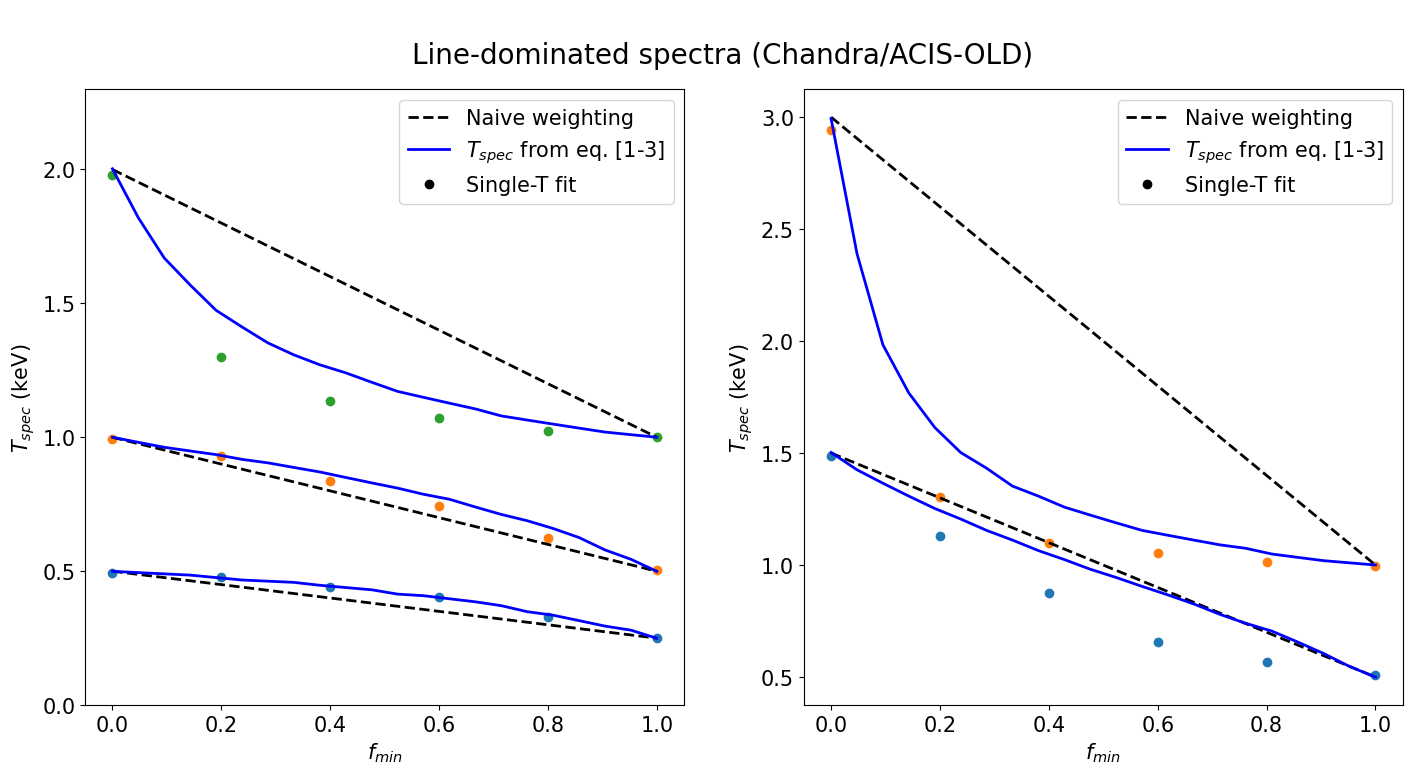

In [53]:
plt.figure(figsize=(17,8))
 
data__name = "data_stats/stats_03.dat"
data__name = "stats449.dat"

data = get_data(data__name, show_table=False)

plt.suptitle('\n' + 'Line-dominated spectra (' + telescope + ')', fontsize = 20)

plt.subplot(1,2,1)

T_mins = (0.25, 0.5, 1.)
T_maxs = (0.5, 1.0, 2.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # mean energy
    plot_Tspec_fmin(T_min, T_max, 21, data, naive=True, lstyle='-', cline='blue')
    plot_Tspec_fmin_details()
    
    # direct fit
    Tspec_list = Tspec_lines_all[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list)
    
    #plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1)
    
plt.ylim(0, 2.3)

    
plt.subplot(1,2,2)

T_mins = (0.5, 1.0)
T_maxs = (1.5, 3.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # mean energy
    plot_Tspec_fmin(T_min, T_max, 21, data, naive=True, lstyle='-', cline='blue')
    plot_Tspec_fmin_details()
    
    #plot_Tspec_fmin(T_min, T_max, 20, get_data("data/stats_10.dat", show_table=False), naive=False, lstyle='-', cline='red')
    
    # direct fit
    Tspec_list = Tspec_lines_all[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list)
    
#plt.savefig('Fig3_'+telescope+'_'+data__name[11:13]+'.png')
plt.show()

# 2. CONTINUUM ONLY

To show list of `xspec` commands use `x.Plot.commands`.
If something is not plotting, try `x.Plot.commands=()`.

## 2.1 $T_{spec}$ from direct fit

### Mazotta-like fit
Single-T fit for mixture of 2 continuums (now working properly):

<Figure size 640x480 with 0 Axes>

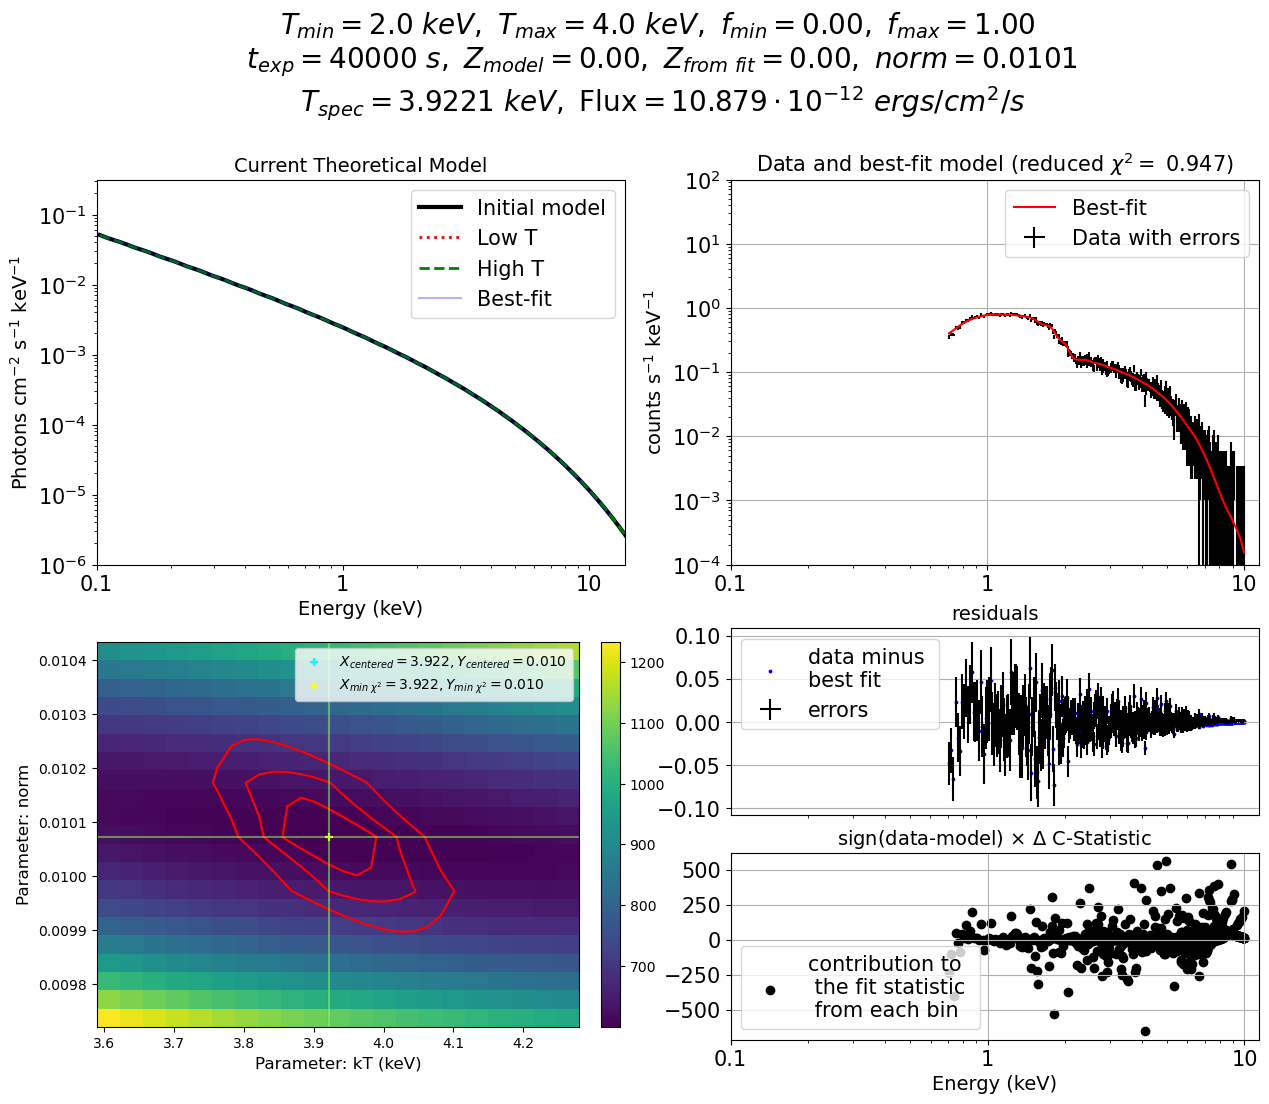

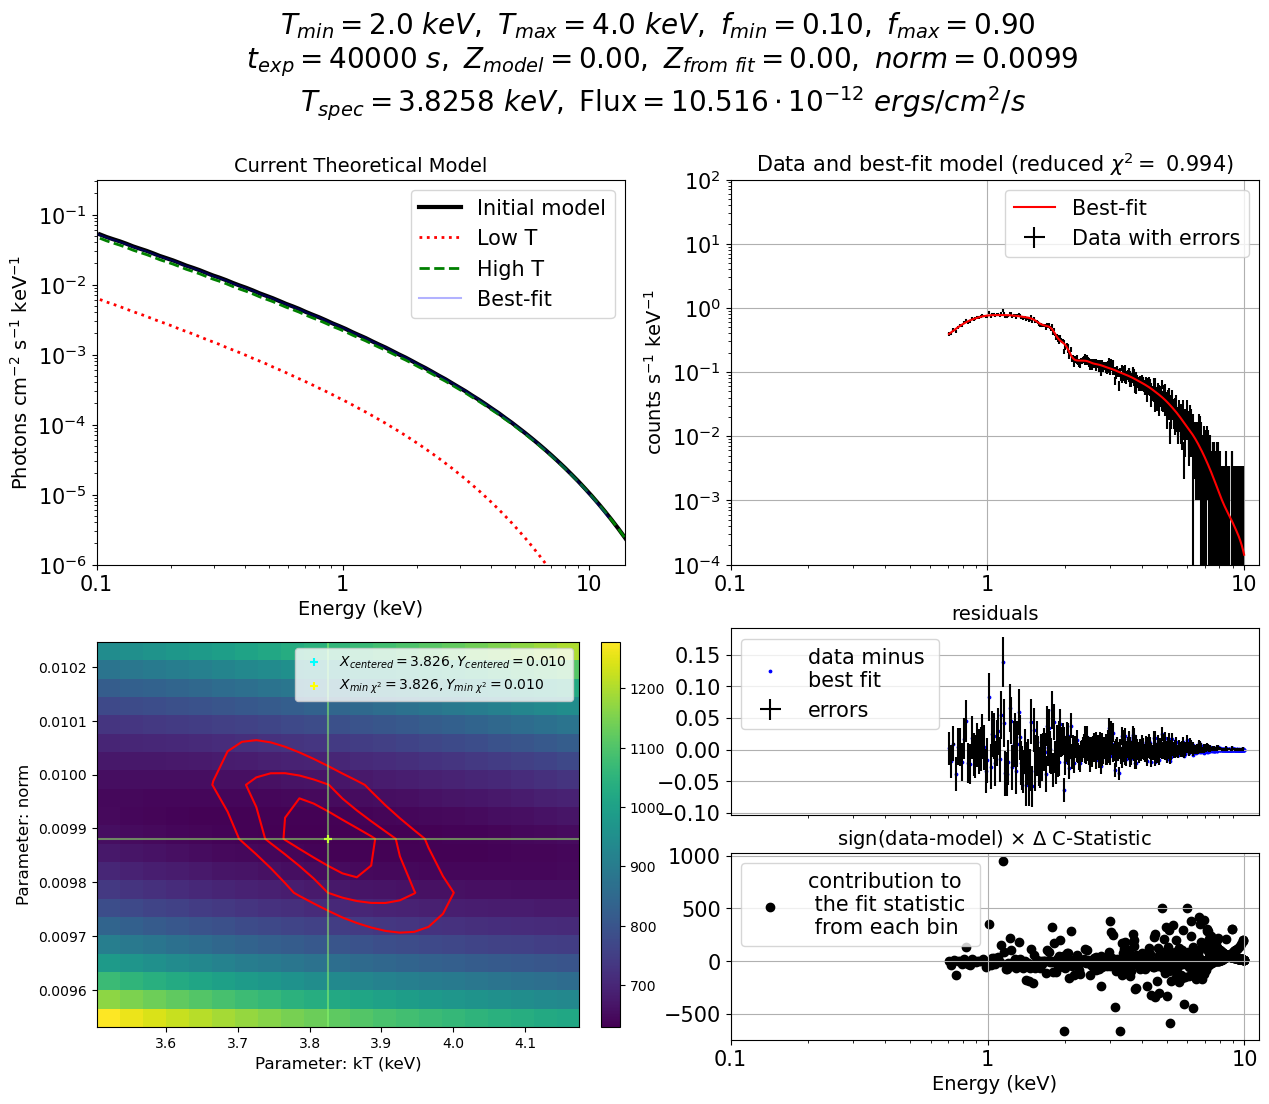

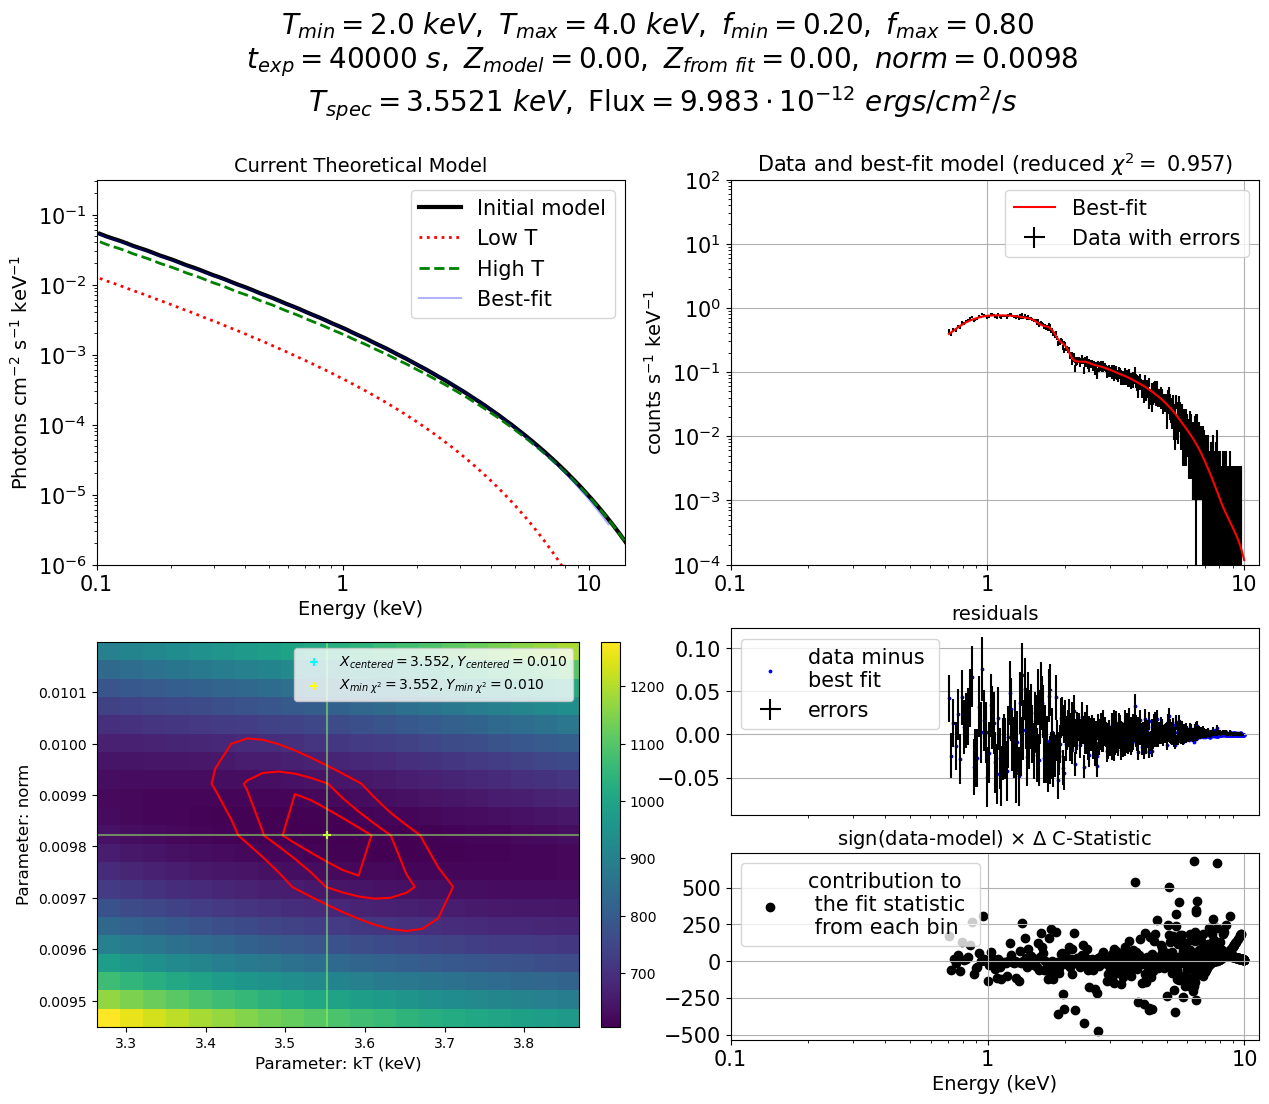

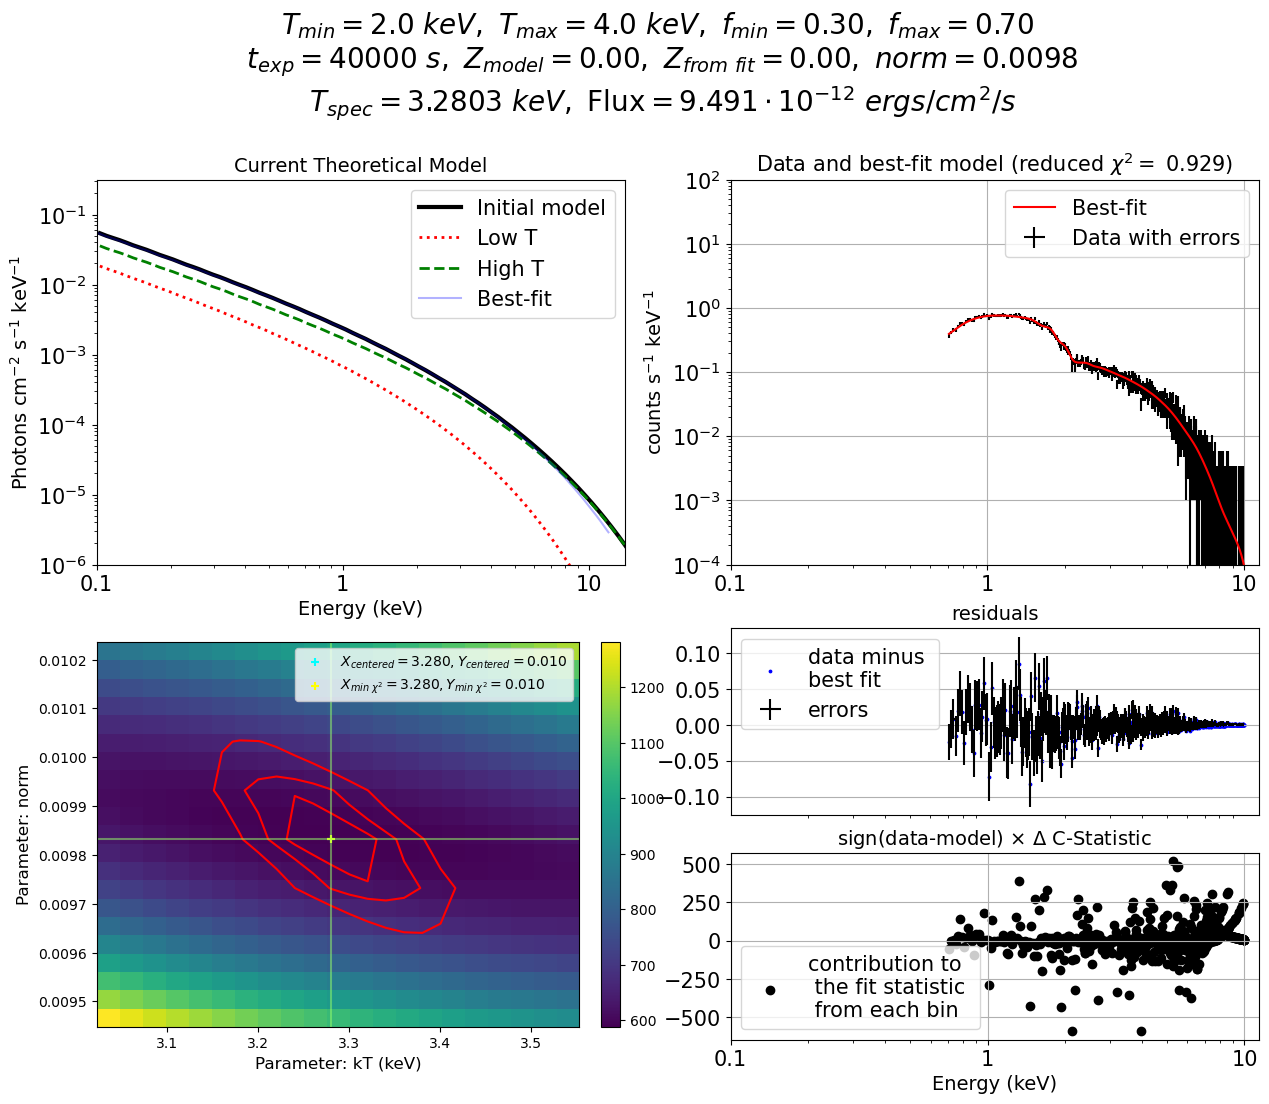

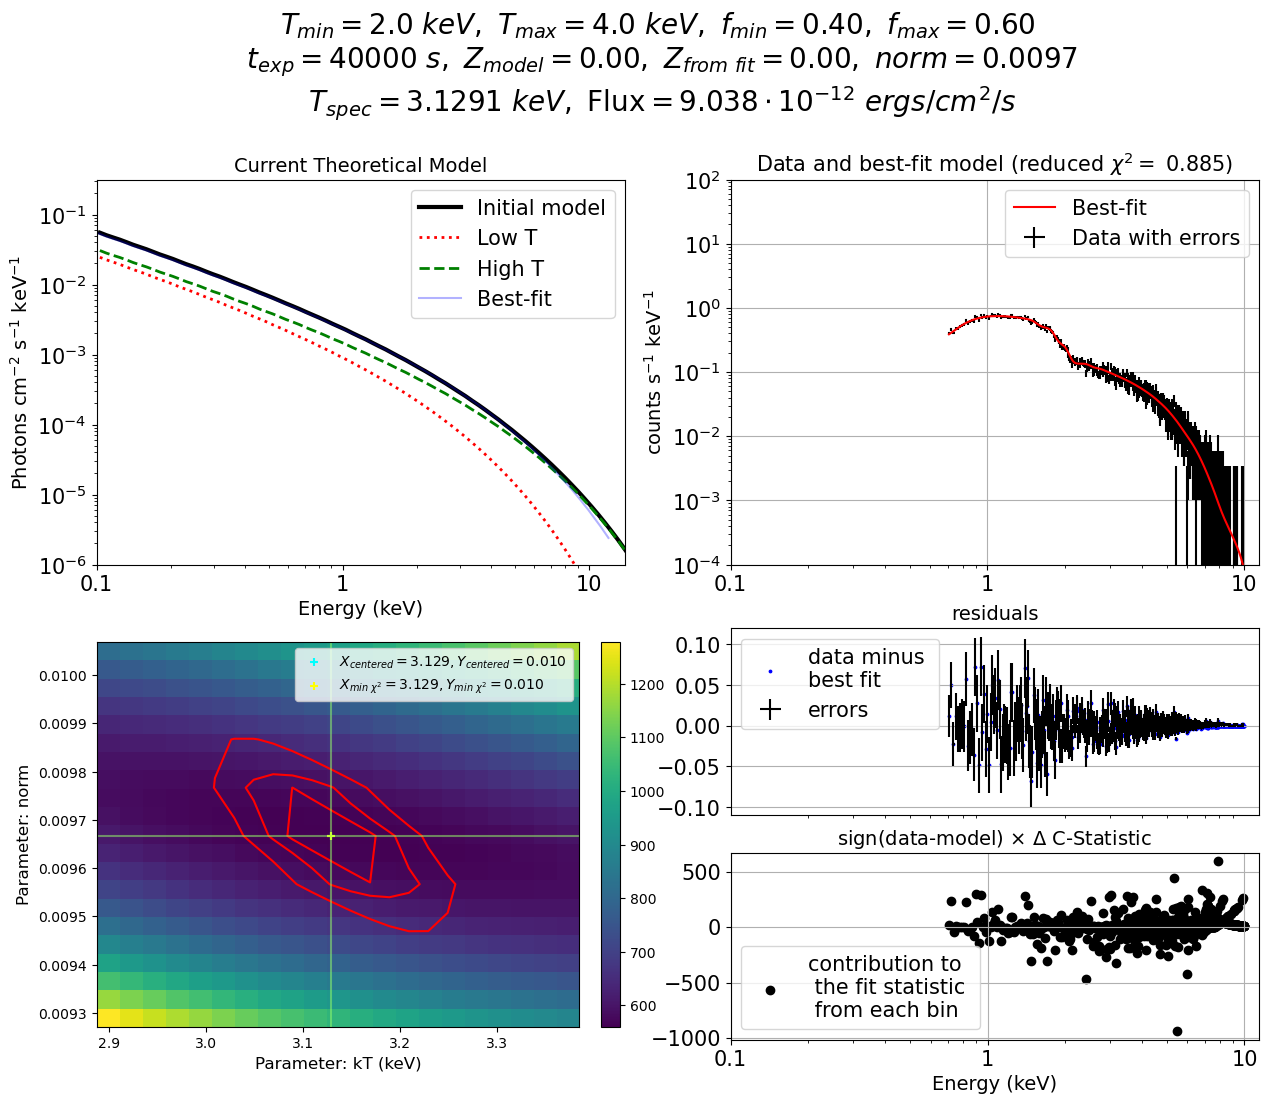

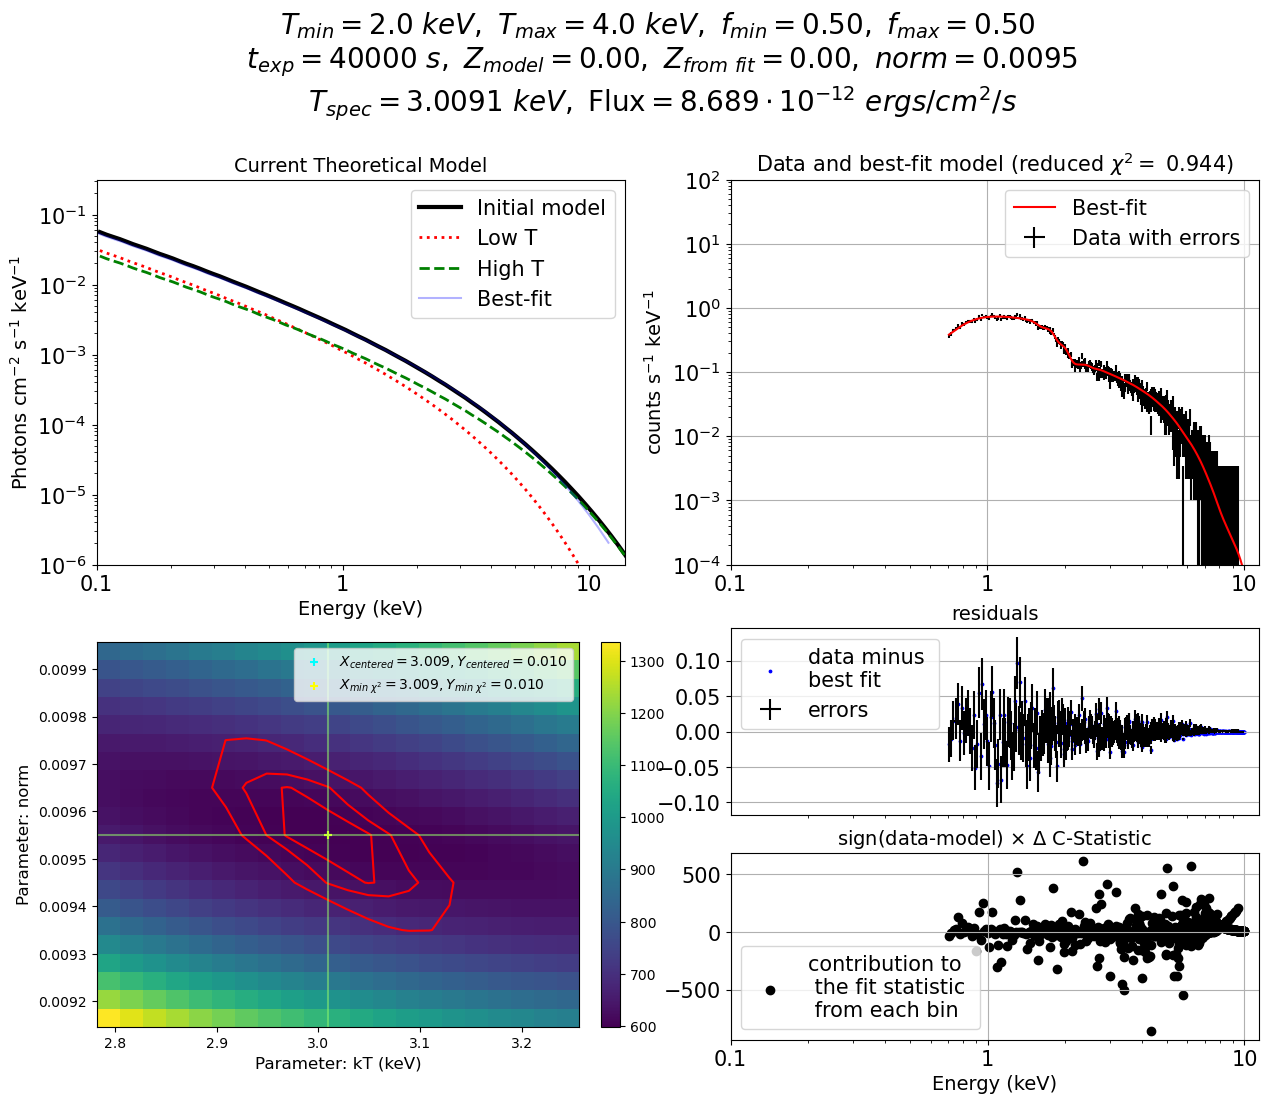

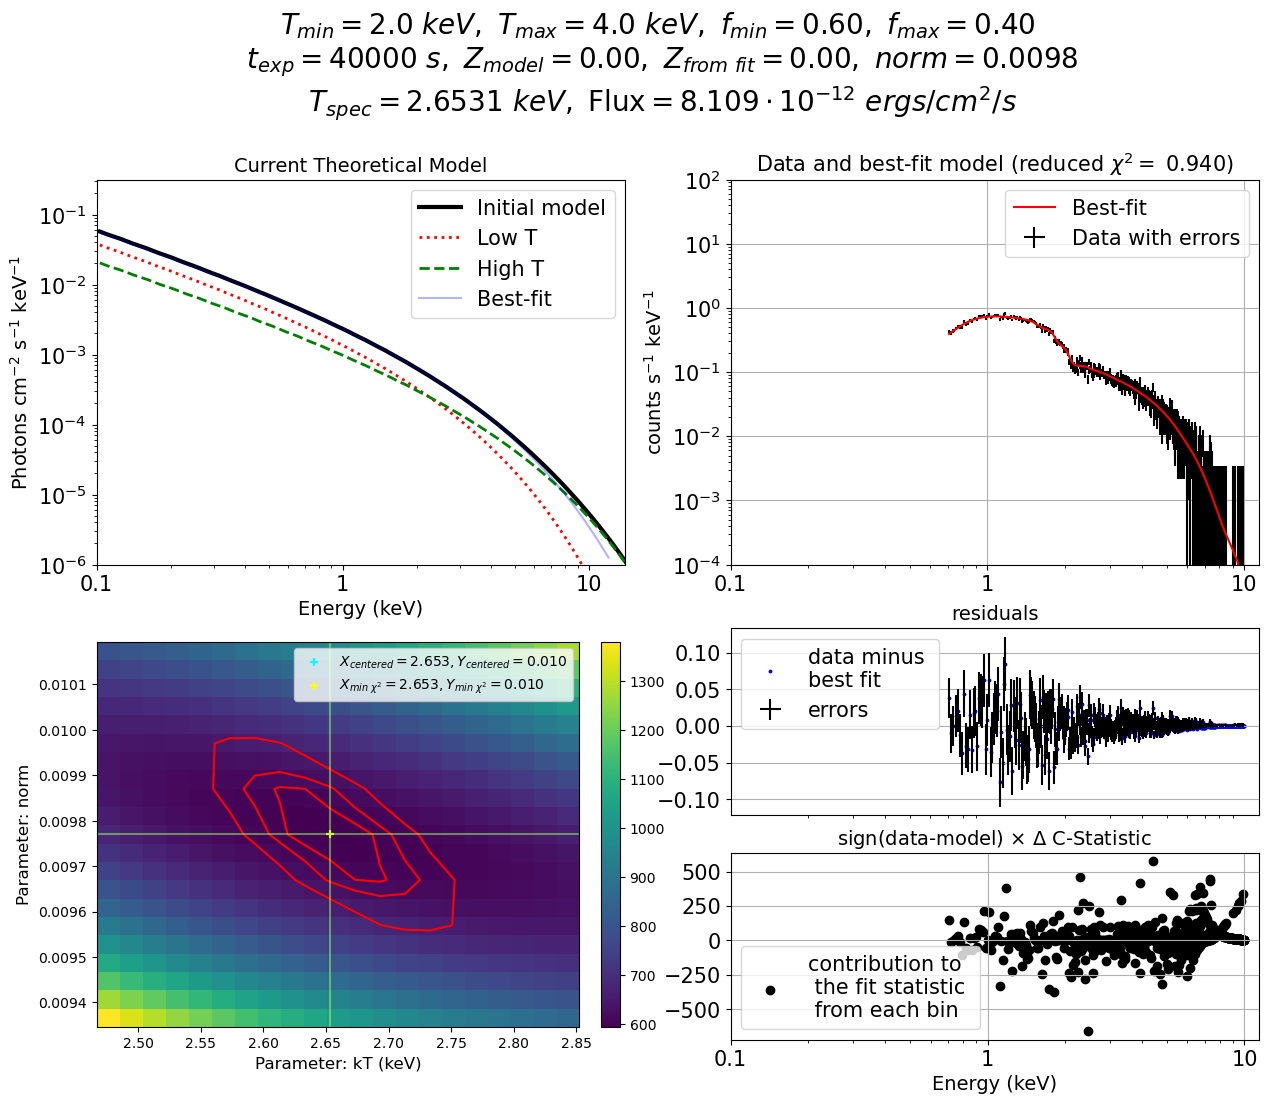

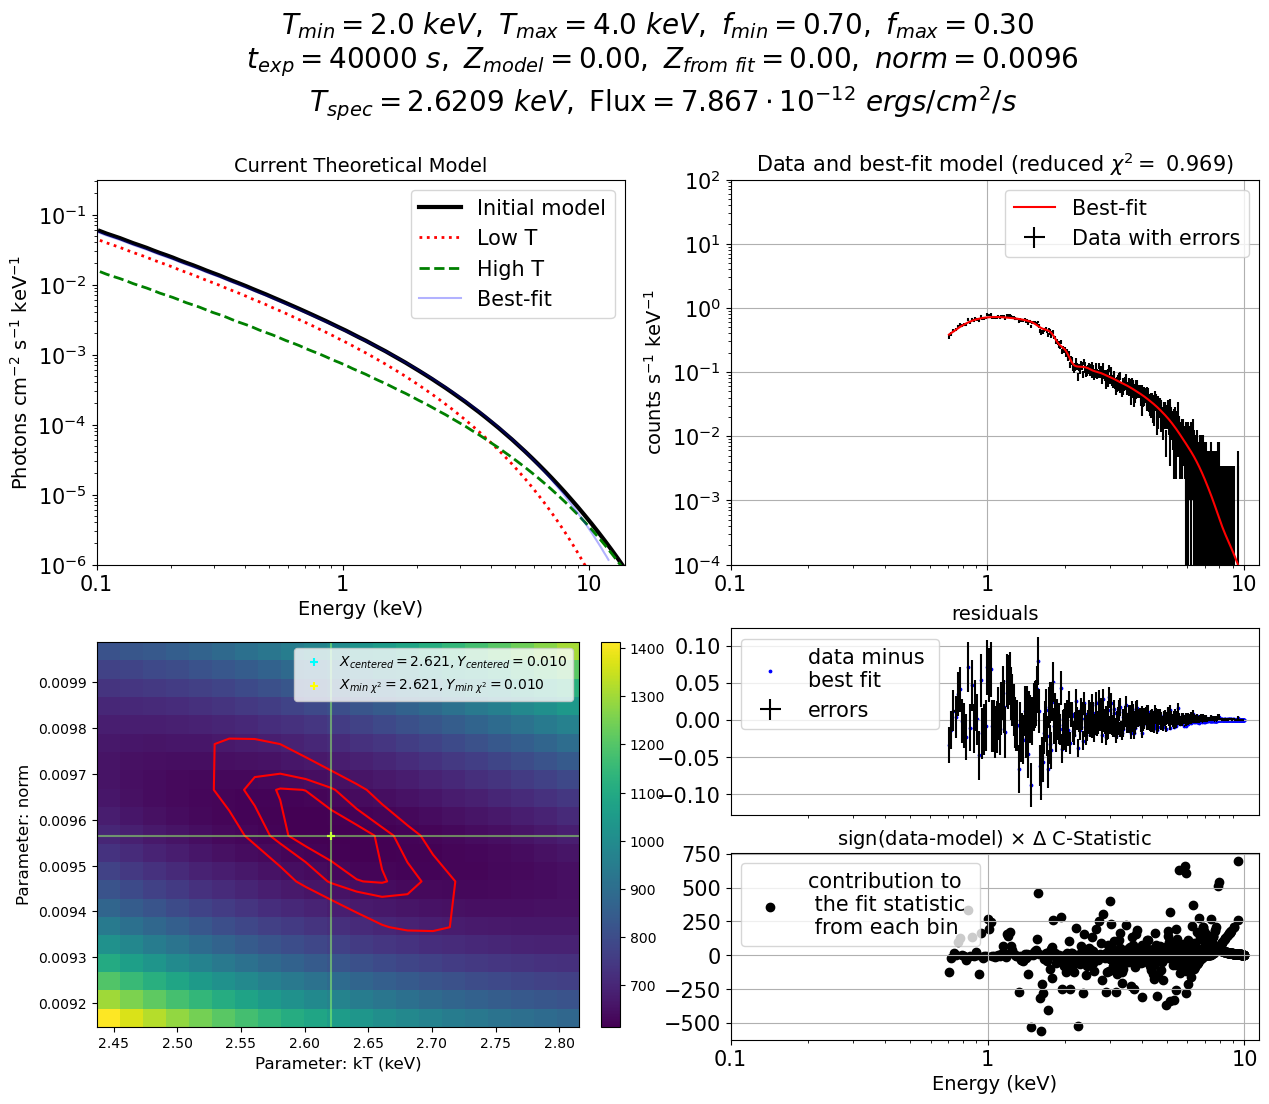

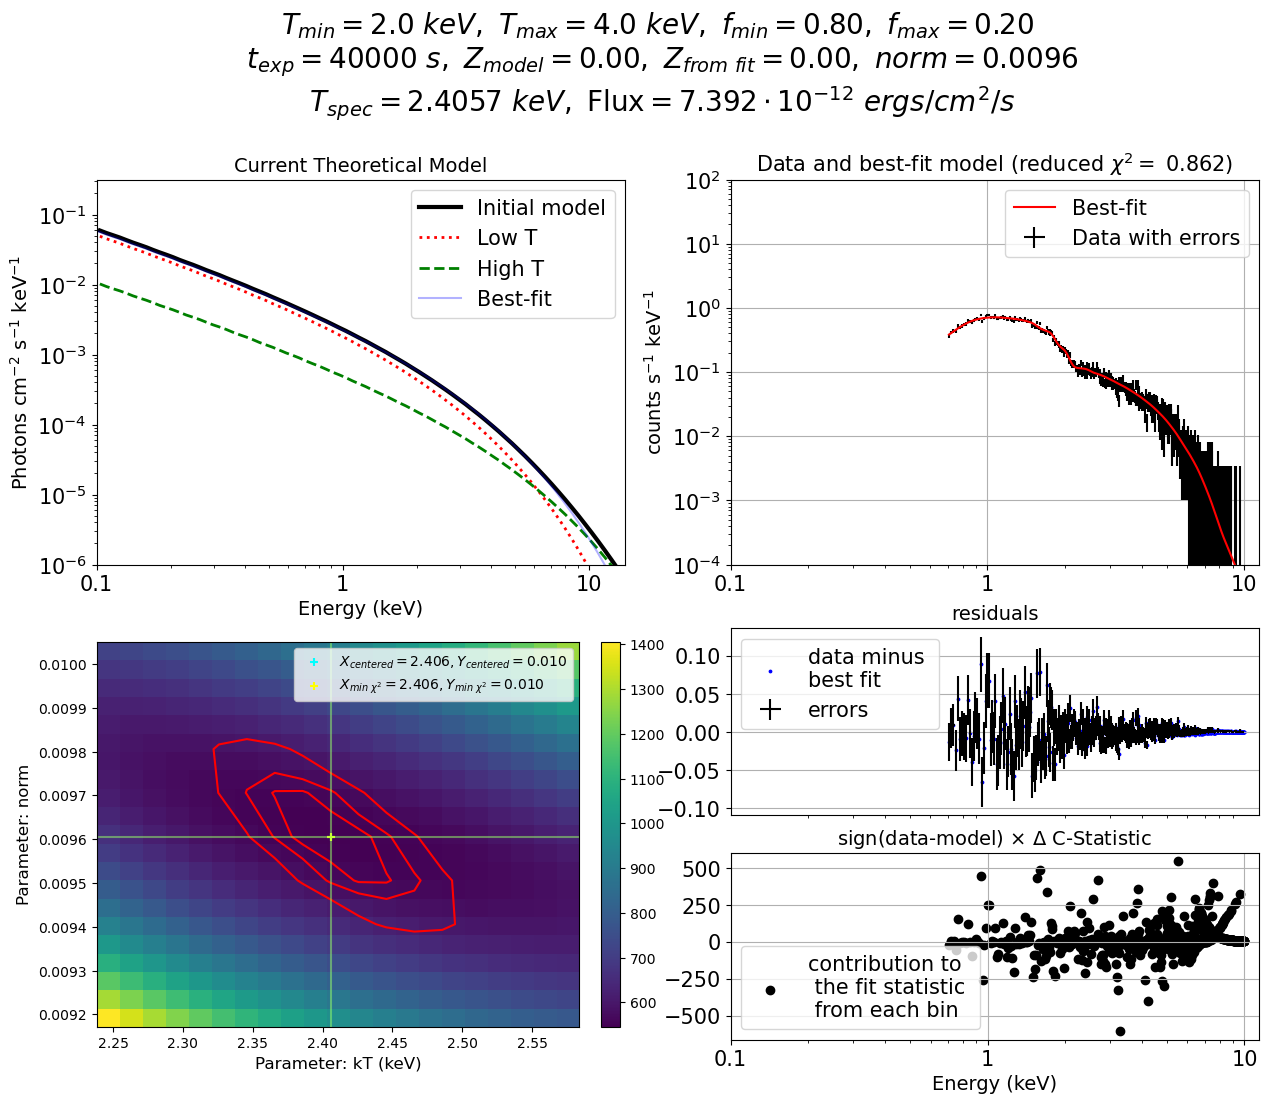

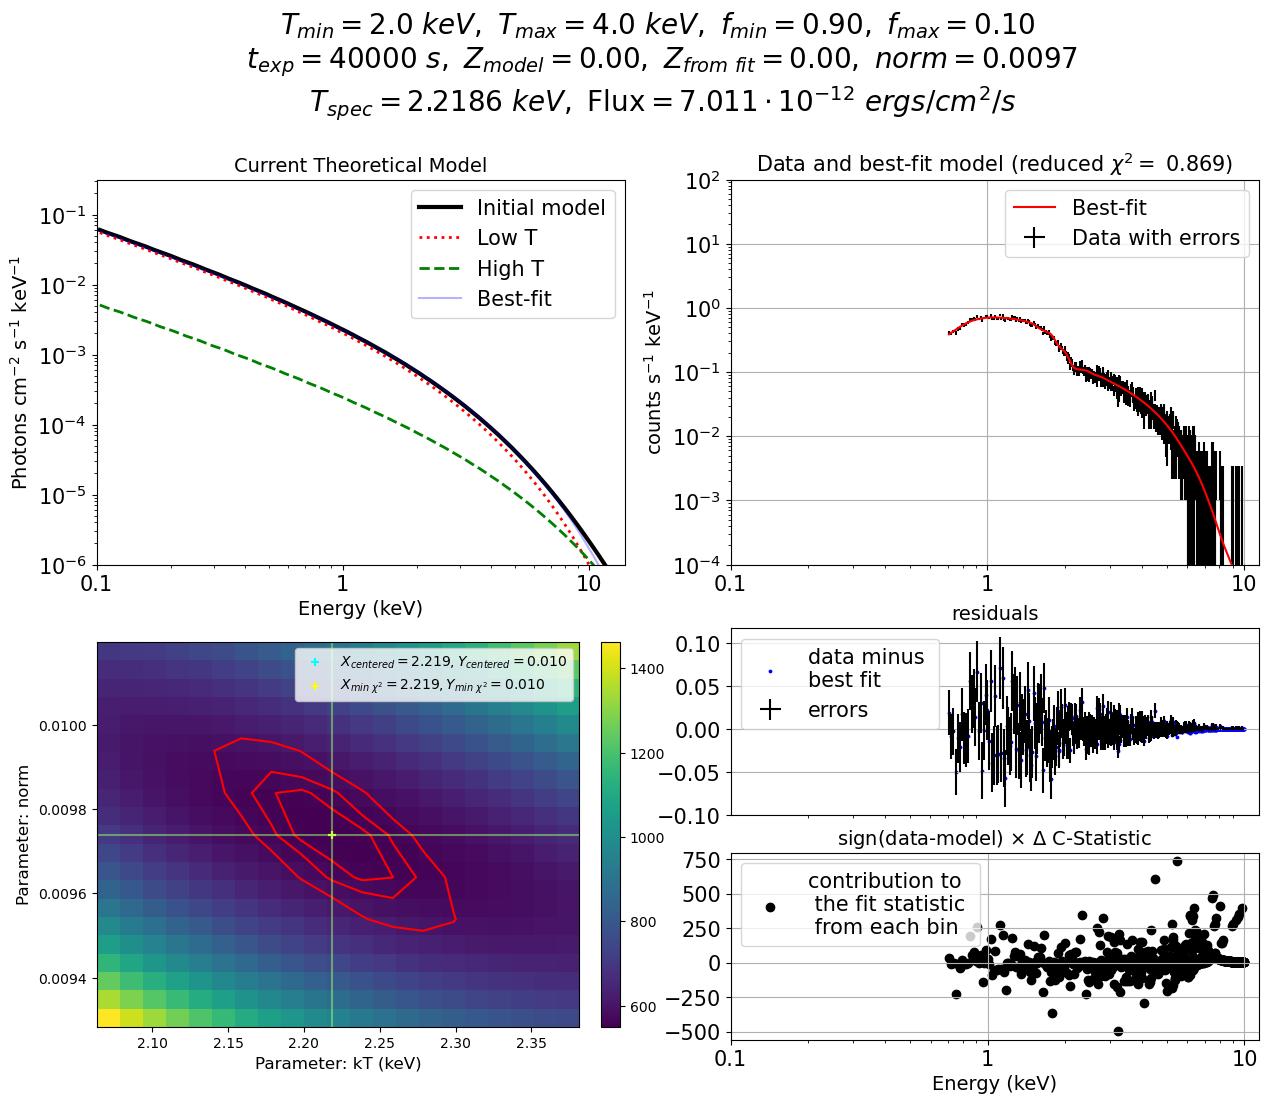

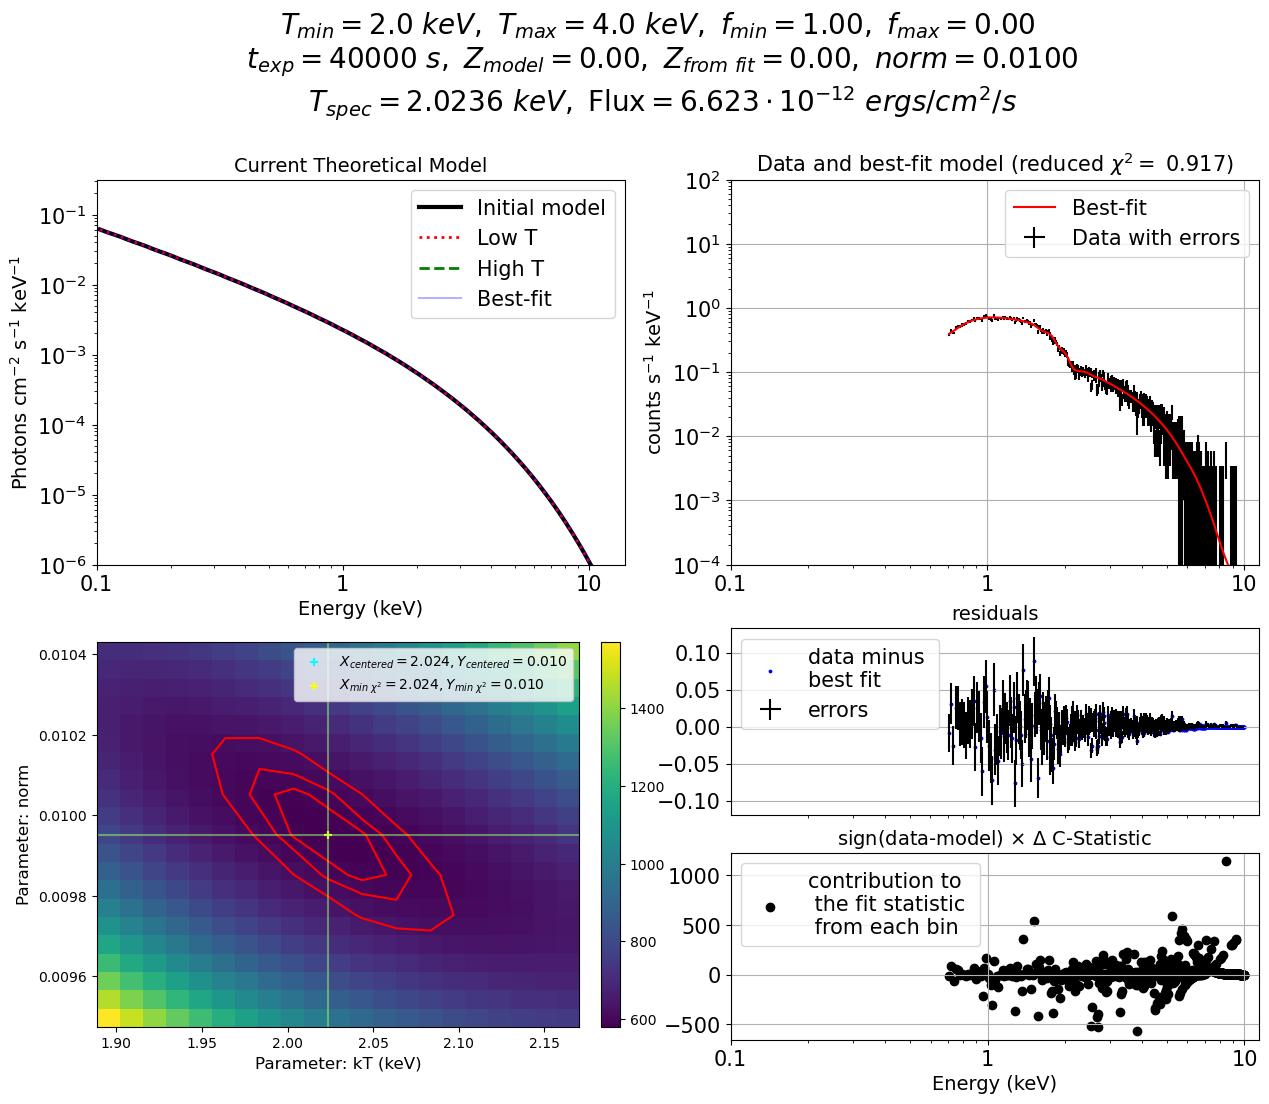

T:  [3.9221316322066038, 3.825792743776859, 3.5520845399601932, 3.2803062349128016, 3.129108927599856, 3.0090607275461907, 2.6530842733547, 2.620882161861374, 2.405726848136777, 2.218599572055826, 2.023605125611769]
F:  [1.0878861173559654e-11, 1.0515999318997564e-11, 9.983420701047386e-12, 9.490920658468304e-12, 9.03759587563183e-12, 8.689404192195774e-12, 8.109368842359842e-12, 7.867020180195472e-12, 7.39213499993913e-12, 7.011086718503246e-12, 6.623439201492718e-12]
[]


In [67]:
logFile = x.Xset.openLog("newLogFile.txt")

%run -i 'utils/fit_cont.py'
    
ccc, fluxccc, dt1_cont, dt2_cont = single_T_fit_continuum(2.0, 4.0, 11, 
                                                          'Chandra/ACIS-OLD', 
                                                          nrm=0.01, 
                                                          texp=40000, 
                                                          stpar=True, 
                                                          plot=True, 
                                                          Xplot=False)
print("T: ", ccc)
print("F: ", fluxccc)
print([(a, b) for a, b in zip(dt1_cont, dt2_cont)])

In [32]:
%run -i 'utils/tspec_norm.py'

temps, temps_spec, temps_diff, dts = calc_Tspec_norm(N_temps=10, 
                                                     T_low=1.0, 
                                                     T_high=8.0, 
                                                     norms=(1, 0.1, 0.01),
                                                     mode='continuum', 
                                                     tlscp='Chandra/ACIS-OLD')

norm = 1: done
norm = 0.1: done
norm = 0.01: done


<Figure size 640x480 with 0 Axes>

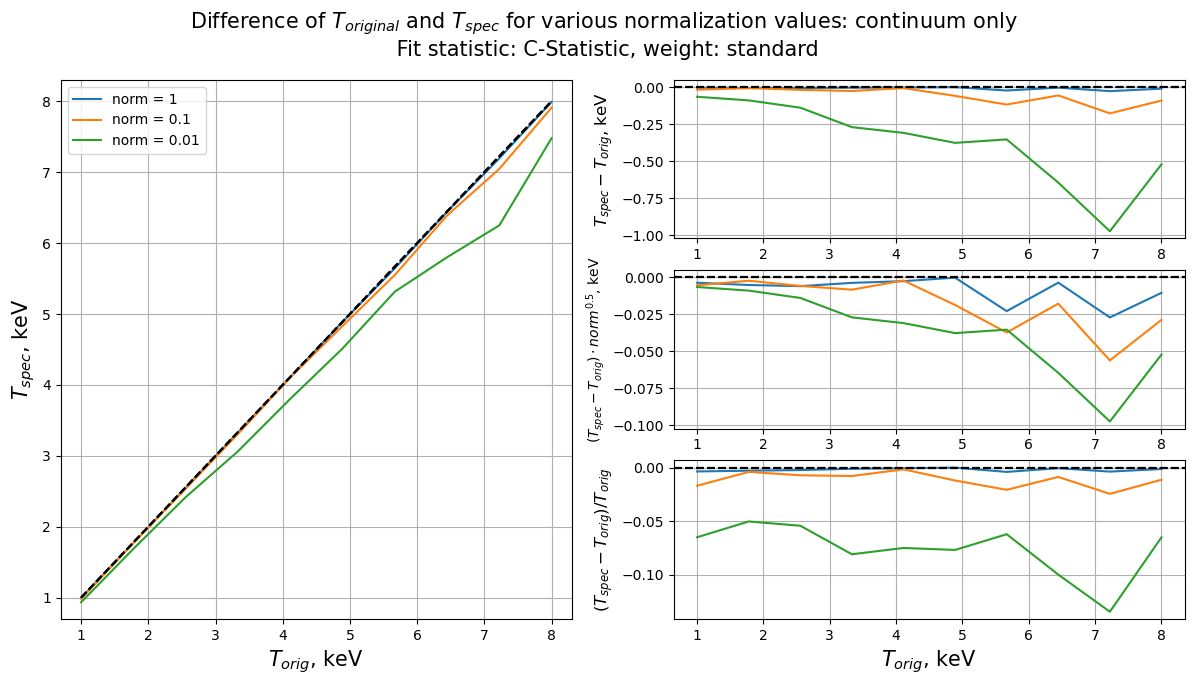

In [35]:
%run -i 'utils/tspec_norm.py'

draw_Tspec_norm(temps, temps_spec, temps_diff, dts, 
                mode='continuum only \n Fit statistic: C-Statistic, weight: standard')

## 2.2 $T_{spec}$ from weighting

In [367]:
%run -i 'utils/avt_cont.py'

<Figure size 640x480 with 0 Axes>

## 2.3 Figure 4

Вычисляем всё необходимое:

In [440]:
#telescope, alpha_current = 'Chandra/ACIS-OLD', 0.875
telescope, alpha_current = 'SRG/eROSITA', 1.01
#telescope, alpha_current = 'XMM-Newton/MOS', 0.900

print(alpha_current)

f_min = np.linspace(0, 1, 21)
T_spec = f_min*0

T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

Tspec_from_eq46 ={}
Tspec_from_fit ={}

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # Tspec from equations 4, 6
    tspec_list = get_Tspec_continuum_eq46(f_min, T_min, T_max, alpha_current, telescope)
    Tspec_from_eq46[str(T_min)+'-'+str(T_max)] = tspec_list
    
    # Tspec from direct fit
    tspec_list_1 = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 1, 40000, 
                                          stpar=False, plot=False, Xplot=False)[0]
    Tspec_from_fit[str(T_min)+'-'+str(T_max)] = tspec_list_1
    
    print(str(T_min)+'-'+str(T_max)+": done")
    
#for key in Tspec_from_eq46.keys():
#    print(key, 'keV')
#    print('Eqs. 4, 6:', [f'{vl:.2f}' for vl in Tspec_from_eq46[key]], '\n')
#    print('Direct fit', [f'{vl:.2f}' for vl in Tspec_from_fit[key]], '\n')

1.01
0.25-1.0: done
0.5-2.0: done
1.0-4.0: done
2.0-8.0: done
4.0-16.0: done


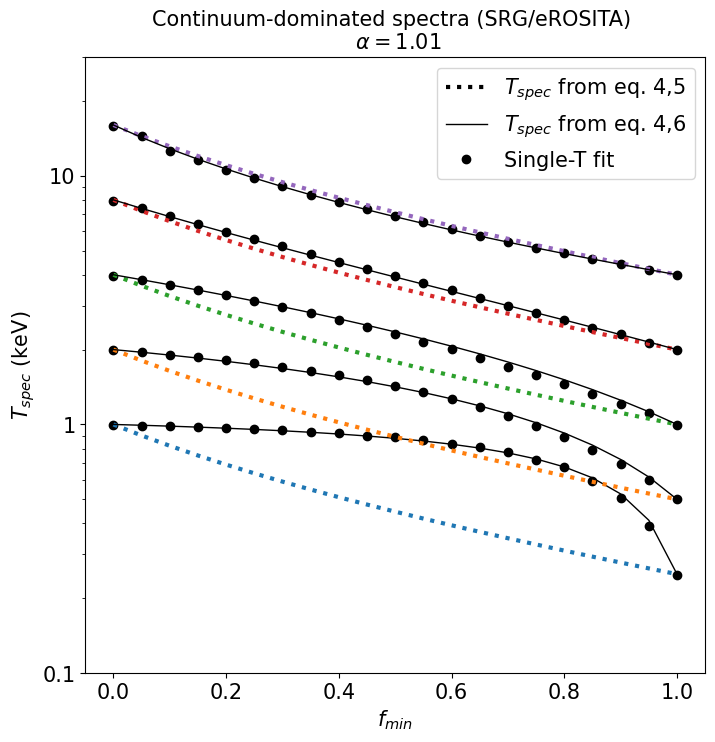

In [441]:
plt.figure(figsize=(8,8))

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # naive weighting
    #plt.plot(f_min, f_min*T_min+(1-f_min)*T_max, linestyle = '--', linewidth=2, color='black')
    
    # Tspec from equations 4, 5
    plt.plot(f_min, get_Tspec_continuum_eq45(f_min, T_min, T_max), linestyle = ':', linewidth = 3)

    # Tspec from equations 4, 6
    Tspec_list = Tspec_from_eq46[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list, color='black', linewidth=1)
    #plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black')
    
    # Tspec from direct fit
    Tspec_list1 = Tspec_from_fit[str(T_min)+'-'+str(T_max)]
    plt.scatter(f_min, Tspec_list1, color='black')
    
#plt.scatter(np.linspace(0, 1, len(T_spec)), T_spec, color='blue')   
    
plt.ylim(0.1, 30)
plt.yscale('log')
plt.xticks(size=15)
plt.yticks([0.1, 1, 10], [0.1, 1, 10], size=15)
plt.xlabel('$f_{min}$', fontsize = 15)
plt.ylabel('$T_{spec}$ (keV)', fontsize = 15)
plt.title('Continuum-dominated spectra ('+telescope+') \n $\\alpha=$'+str(alpha_current), fontsize = 15)

handles, labels = plt.gca().get_legend_handles_labels()
#line_n = Line2D([], [], label='Naive weighting', color='black', linestyle='--', linewidth=2)
line_e = Line2D([], [], label='$T_{spec}$ from eq. 4,5', color='black', linestyle=':', linewidth=3)
dots_f = Line2D([], [], label='$T_{spec}$ from eq. 4,6', color='black', linestyle='-', linewidth=1)
dots_T = Line2D([], [], label='Single-T fit', color='black', marker='.', linewidth=0, markersize=12)
handles.extend([line_e, dots_f, dots_T])
plt.legend(handles=handles, fontsize=15)

#plt.savefig('Fig4_'+str(telescope)+'.png')
plt.show()

## 2.4 Searching for $\alpha_{min}$

Let's try to find the value of $\alpha$ at which $T_{sl}$ from equations 4,6 is the closest to $T_{spec}$ from direct fit. Observations by SRG/eROSITA and also by Chandra are considered. See eq. (13) from Mazzotta et al. (2004): https://arxiv.org/pdf/astro-ph/0404425.pdf

$\Delta=\frac{1}{N} \sum_{T_1, T_2} \sqrt{\left(\frac{T_{\mathrm{sl}} - T_{\mathrm{spec}}}{T_{\mathrm{spec}}}\right)^2}$

In [429]:
%run -i 'utils/avt_cont.py'
%run -i 'utils/fit_cont.py'

#telescope = 'Chandra/ACIS-OLD' 
telescope = 'SRG/eROSITA'
#telescope = 'XMM-Newton/MOS'

deltas = []
alphas = np.linspace(0.600, 1.200, 81)

f_min = np.linspace(0, 1, 21)

for a in alphas:

    delta_sum = 0
    N_deltasum = 0

    T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
    T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

    Delta_fin = 0
    NDeltas = 2
    
    for i in range(0, NDeltas):
        
        for T_min, T_max in list(zip(T_mins, T_maxs)):

            # Tspec from equations 4, 6
            T_sl = get_Tspec_continuum_eq46(f_min, T_min, T_max, a, telescope)
            #print(T_sl)

            # Tspec from direct fit
            #T_spec = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, nrm=1, 
            #                                texp=40000, stpar=False, plot=False, Xplot=False)[0]
            T_spec = Tspec_from_fit[str(T_min)+'-'+str(T_max)]
            #print(T_spec)

            difference = [Ta-Tb for Ta, Tb in zip(T_sl, T_spec)]
            terms = [num/denom for num, denom in zip(difference, T_spec)]
            terms2 = [t**2 for t in terms]
            sqrterms2 = [np.sqrt(tt) for tt in terms2]
            delta_term = np.sum(sqrterms2)
            delta_sum = delta_sum + delta_term
            N_deltasum = N_deltasum + len(f_min)
            print(N_deltasum, end=" ")

        Delta = delta_sum/N_deltasum

        Delta_fin +=Delta/NDeltas
        
    print(a, Delta_fin)

    deltas.append(Delta_fin)

21 42 63 84 105 126 147 168 189 210 0.6 0.11766931066826454
21 42 63 84 105 126 147 168 189 210 0.6074999999999999 0.1155331958712738
21 42 63 84 105 126 147 168 189 210 0.615 0.11339868026265804
21 42 63 84 105 126 147 168 189 210 0.6224999999999999 0.11126580161168047
21 42 63 84 105 126 147 168 189 210 0.63 0.10913459753449443
21 42 63 84 105 126 147 168 189 210 0.6375 0.10700510549213711
21 42 63 84 105 126 147 168 189 210 0.645 0.10487736278854735
21 42 63 84 105 126 147 168 189 210 0.6525 0.10275140656860979
21 42 63 84 105 126 147 168 189 210 0.6599999999999999 0.10062727381622394
21 42 63 84 105 126 147 168 189 210 0.6675 0.09850500135239991
21 42 63 84 105 126 147 168 189 210 0.6749999999999999 0.0963846258333793
21 42 63 84 105 126 147 168 189 210 0.6825 0.09426618374878253
21 42 63 84 105 126 147 168 189 210 0.69 0.09214971141978259
21 42 63 84 105 126 147 168 189 210 0.6975 0.09003524499730453
21 42 63 84 105 126 147 168 189 210 0.705 0.08792282046025218
21 42 63 84 105 126

<Figure size 640x480 with 0 Axes>

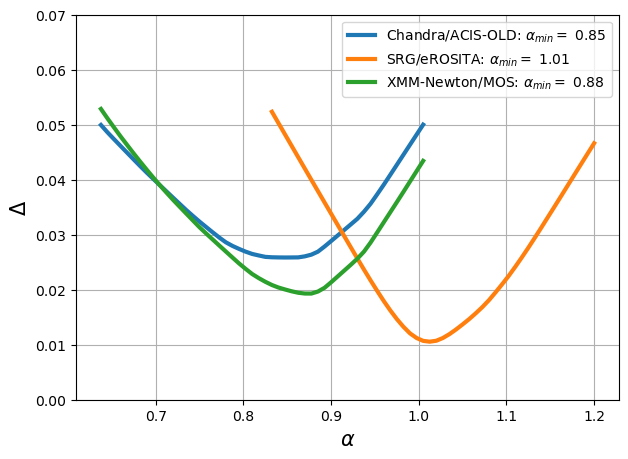

In [439]:
if telescope == 'Chandra/ACIS-OLD': 
    alphas_CH = alphas
    deltas_CH = deltas
elif telescope == 'SRG/eROSITA':
    alphas_ER = alphas
    deltas_ER = deltas
elif telescope == 'XMM-Newton/MOS':
    alphas_XN = alphas
    deltas_XN = deltas

plt.figure(figsize=(7,5))
plt.plot(alphas_CH[5:55], deltas_CH[5:55], linewidth=3, label=f'Chandra/ACIS-OLD: $\\alpha_{{min}} =$ {alphas_CH[np.argmin(deltas_CH)]:.2f}')
plt.plot(alphas_ER[31:], deltas_ER[31:], linewidth=3, label=f'SRG/eROSITA: $\\alpha_{{min}} =$ {alphas_ER[np.argmin(deltas_ER)]:.2f}')
plt.plot(alphas_XN[5:55], deltas_XN[5:55], linewidth=3, label=f'XMM-Newton/MOS: $\\alpha_{{min}} =$ {alphas_XN[np.argmin(deltas_XN)]:.2f}')
#plt.plot(alphas, deltas, linewidth=3, label=f'{telescope}: $\\alpha_{{min}} =$ {alphas[np.argmin(deltas)]:.2f}')
plt.xlabel('$\\alpha$', fontsize=15)
plt.ylabel('$\\Delta$', fontsize=15)#, rotation = 'horizontal')
plt.ylim(0, 0.07)
plt.legend()
plt.grid()
#plt.savefig('delta_alpha_ER.png')
plt.show()

We can see that $\Delta$ reaches its minimum at $\alpha=0.73$ (for SRG/eROSITA observations). 

# 3. REALISTIC METALLICITIES

## 3.1 $T_{spec}$ from direct fit

<Figure size 640x480 with 0 Axes>

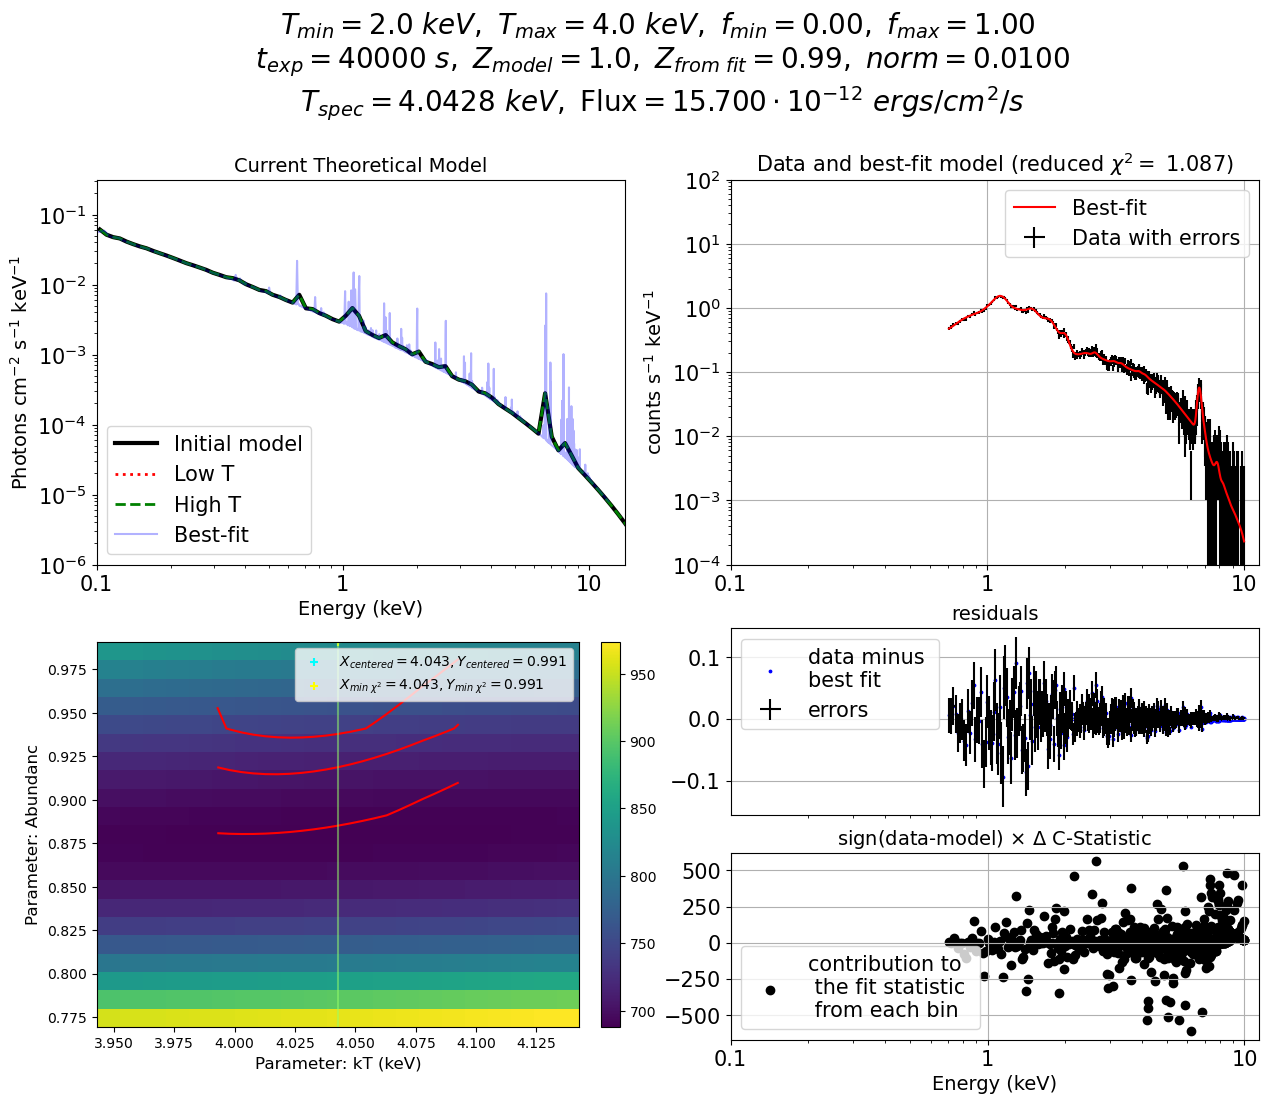

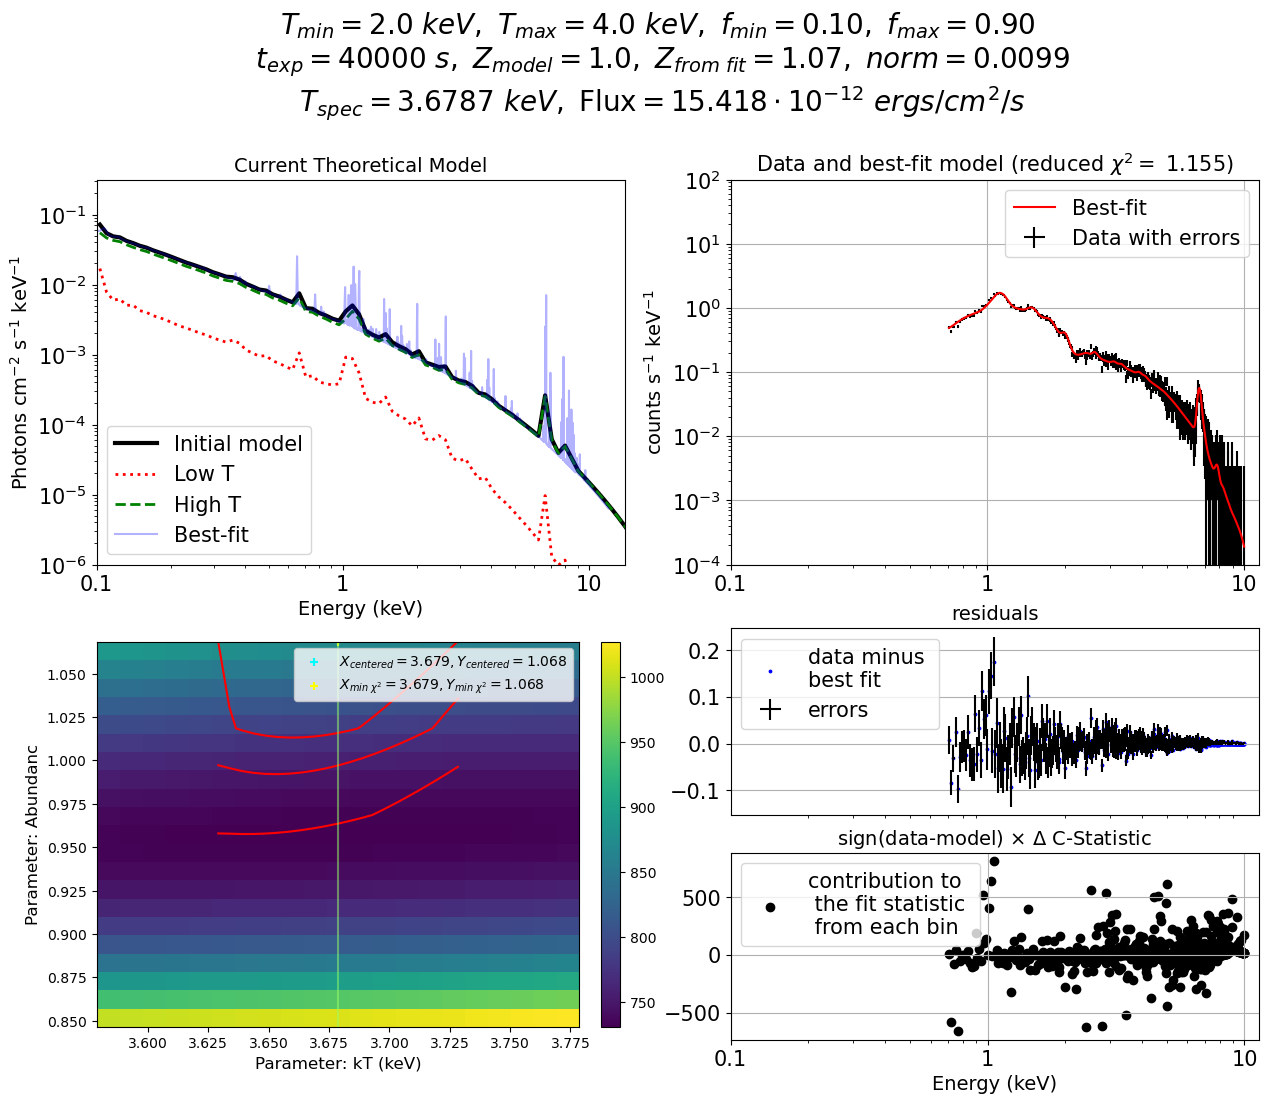

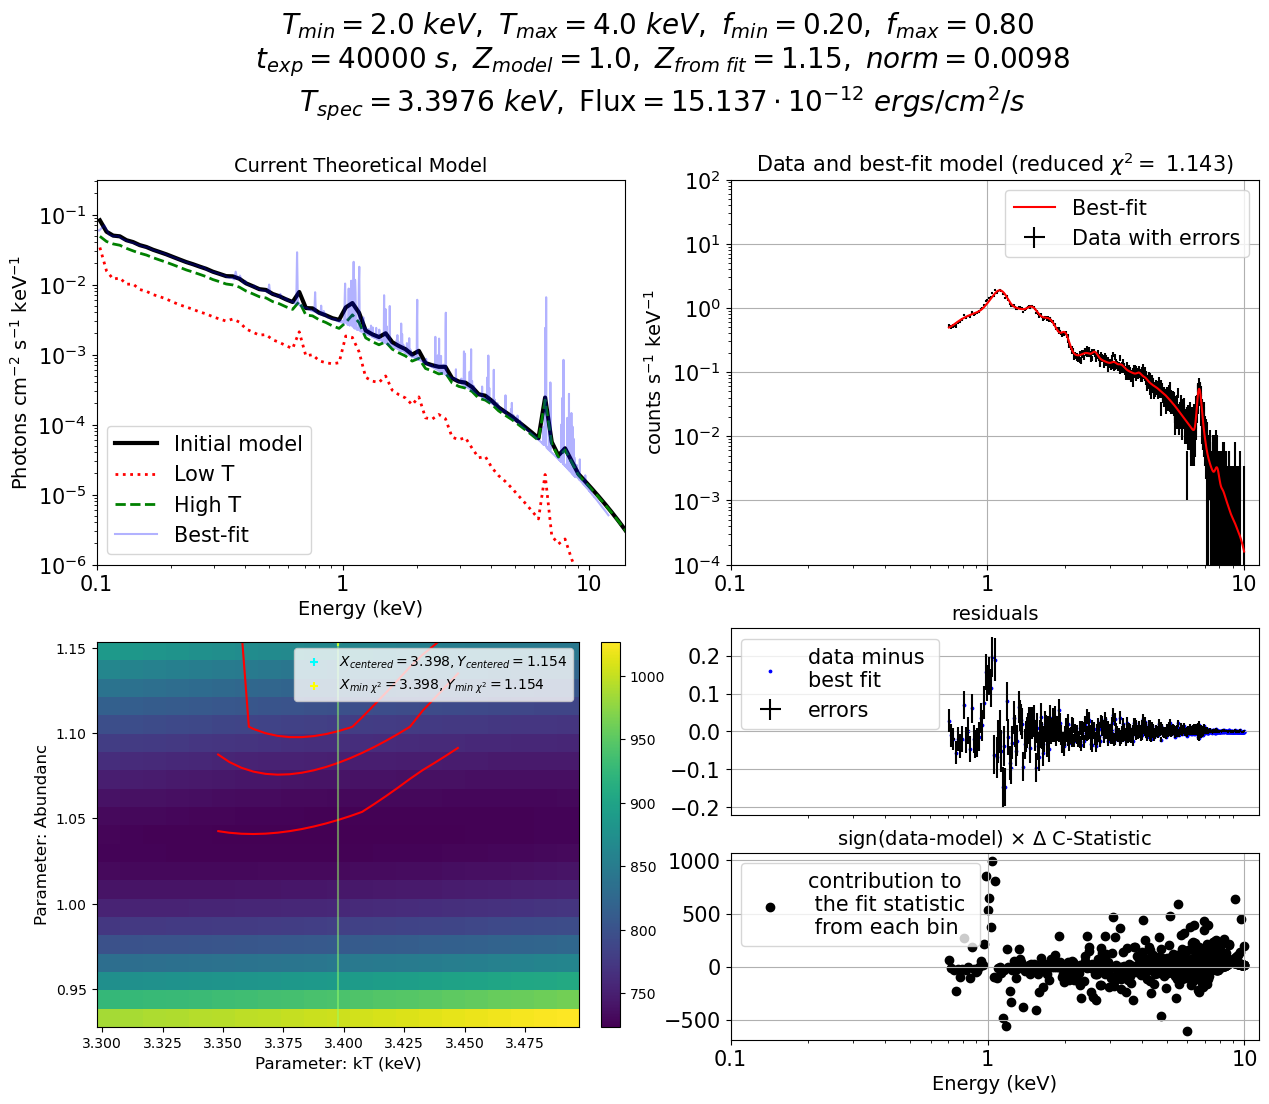

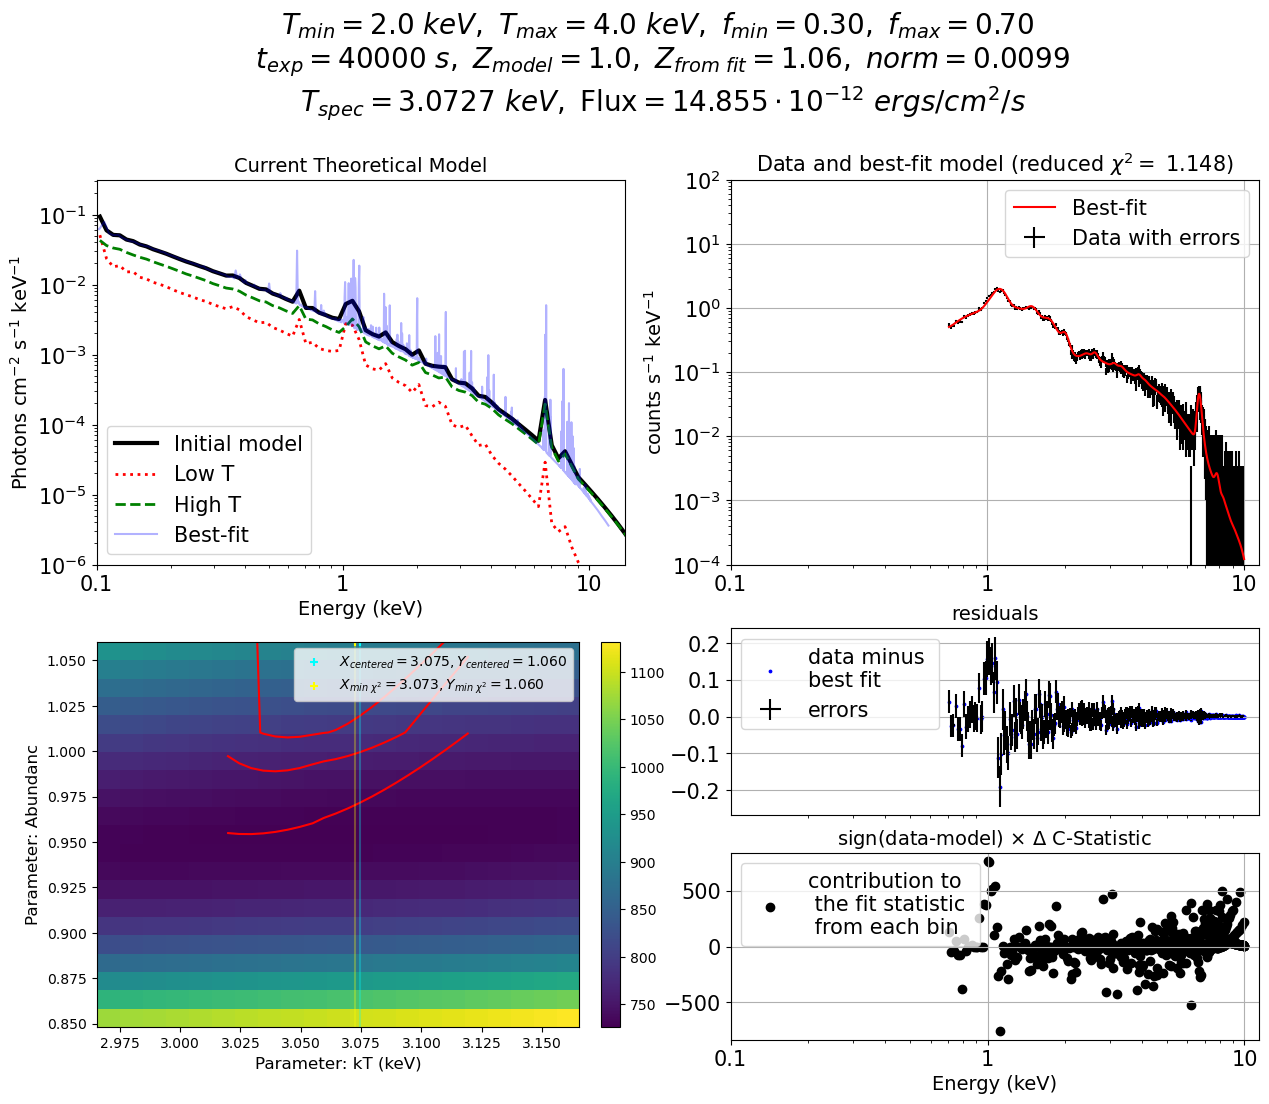

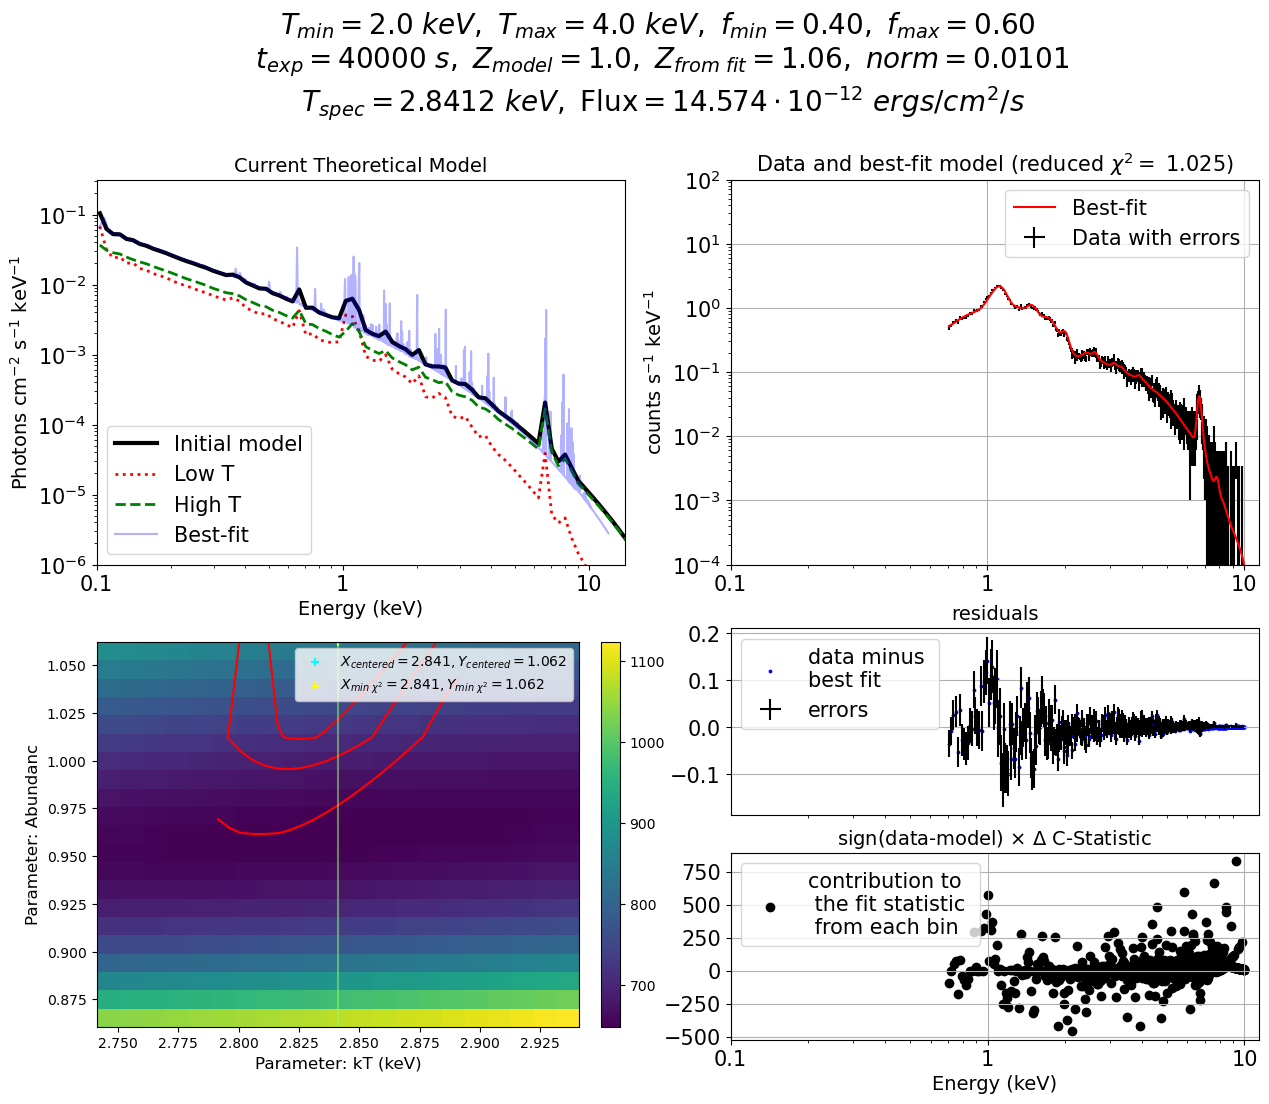

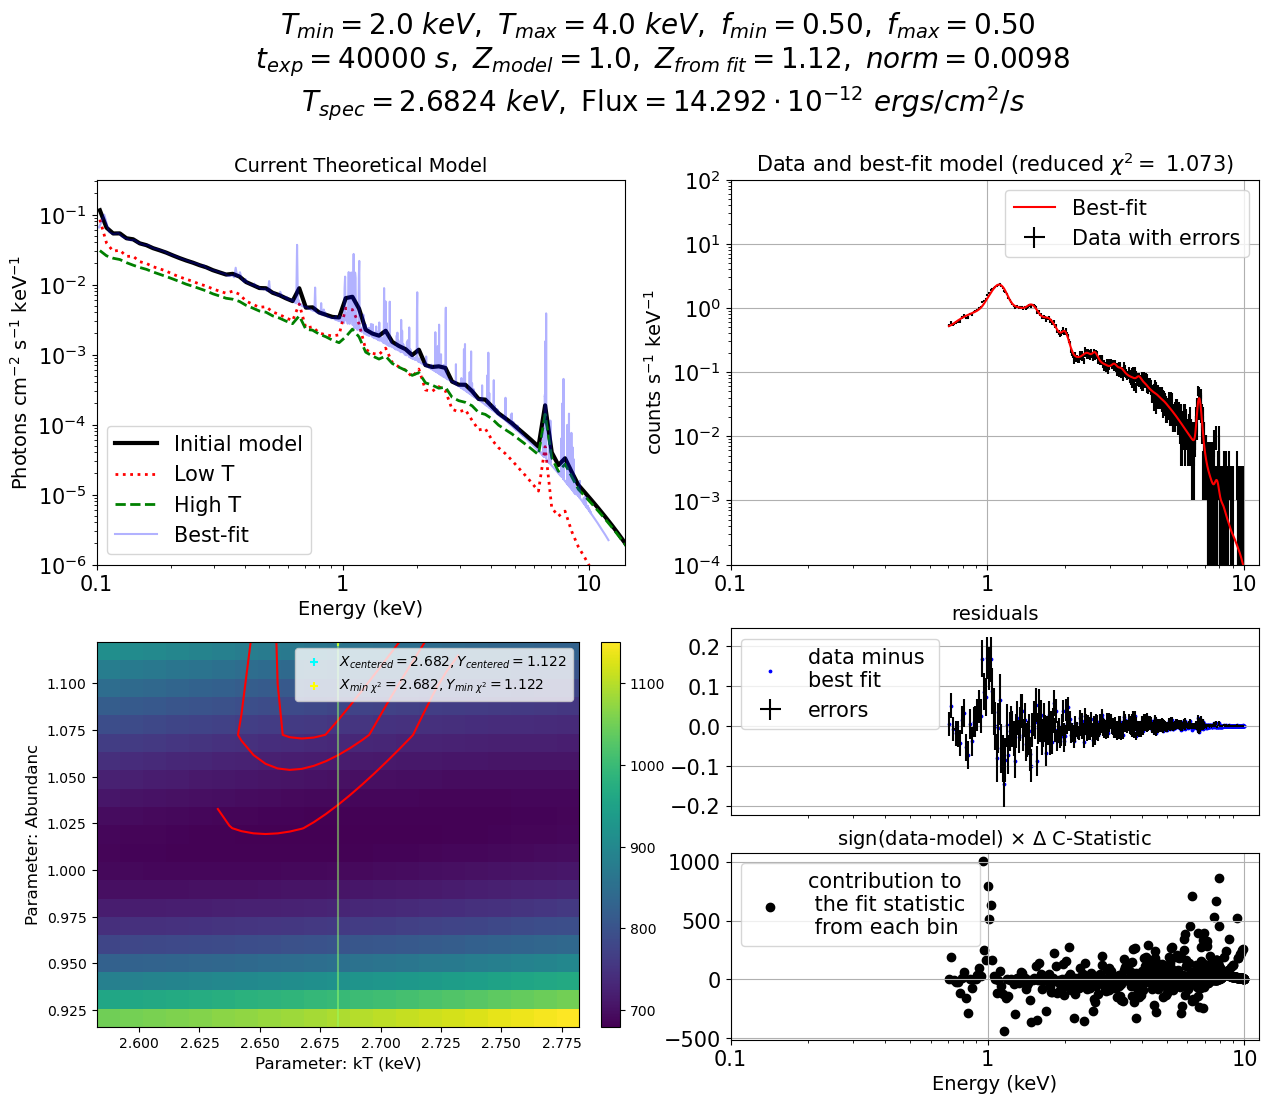

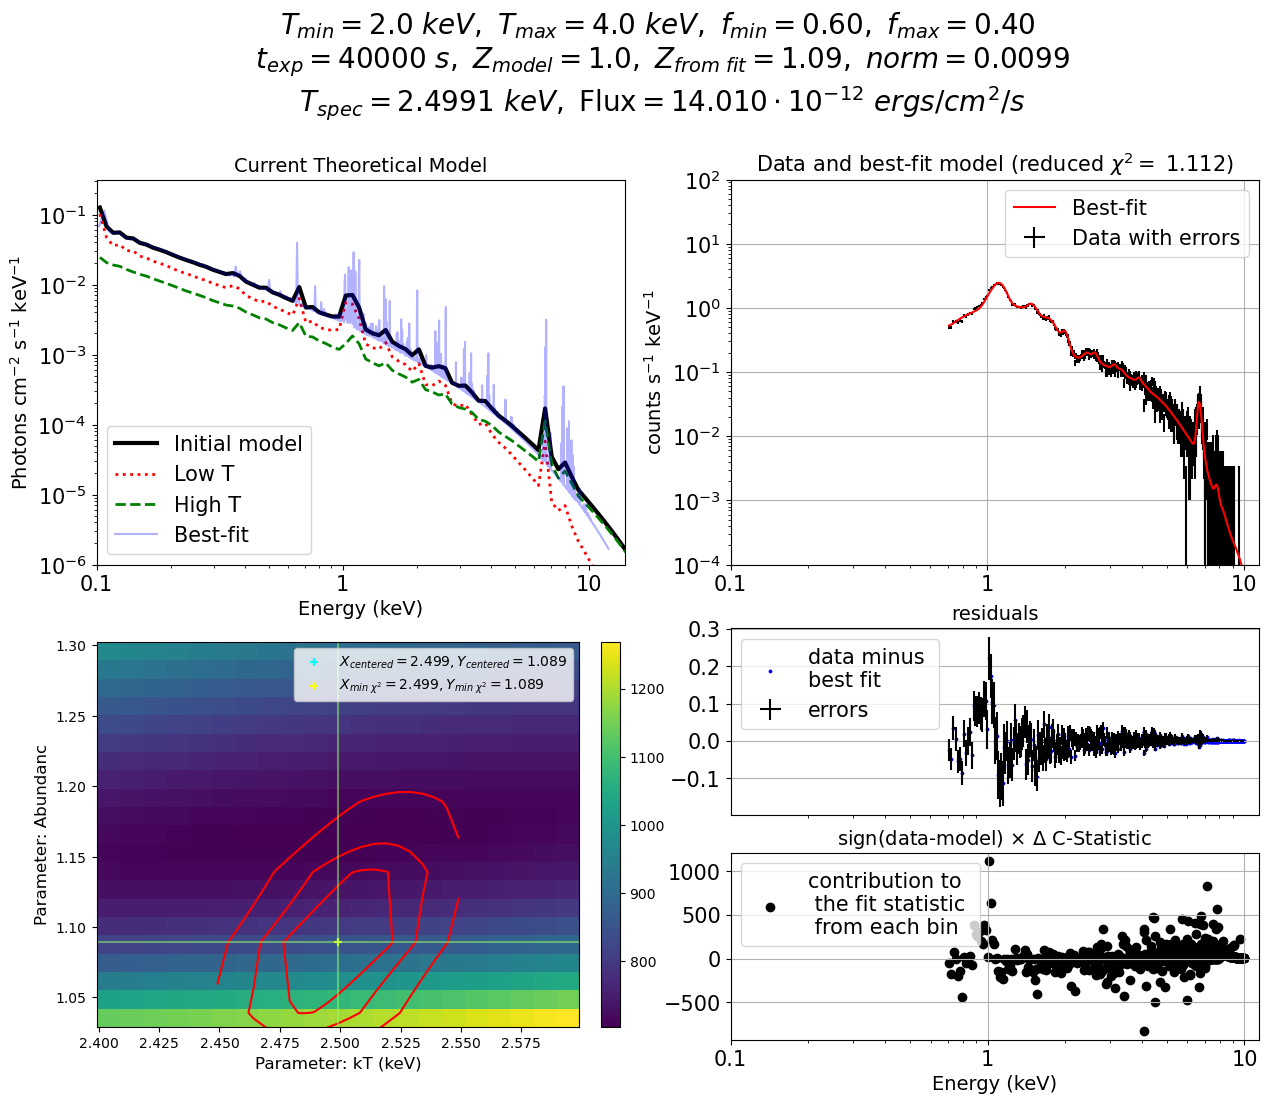

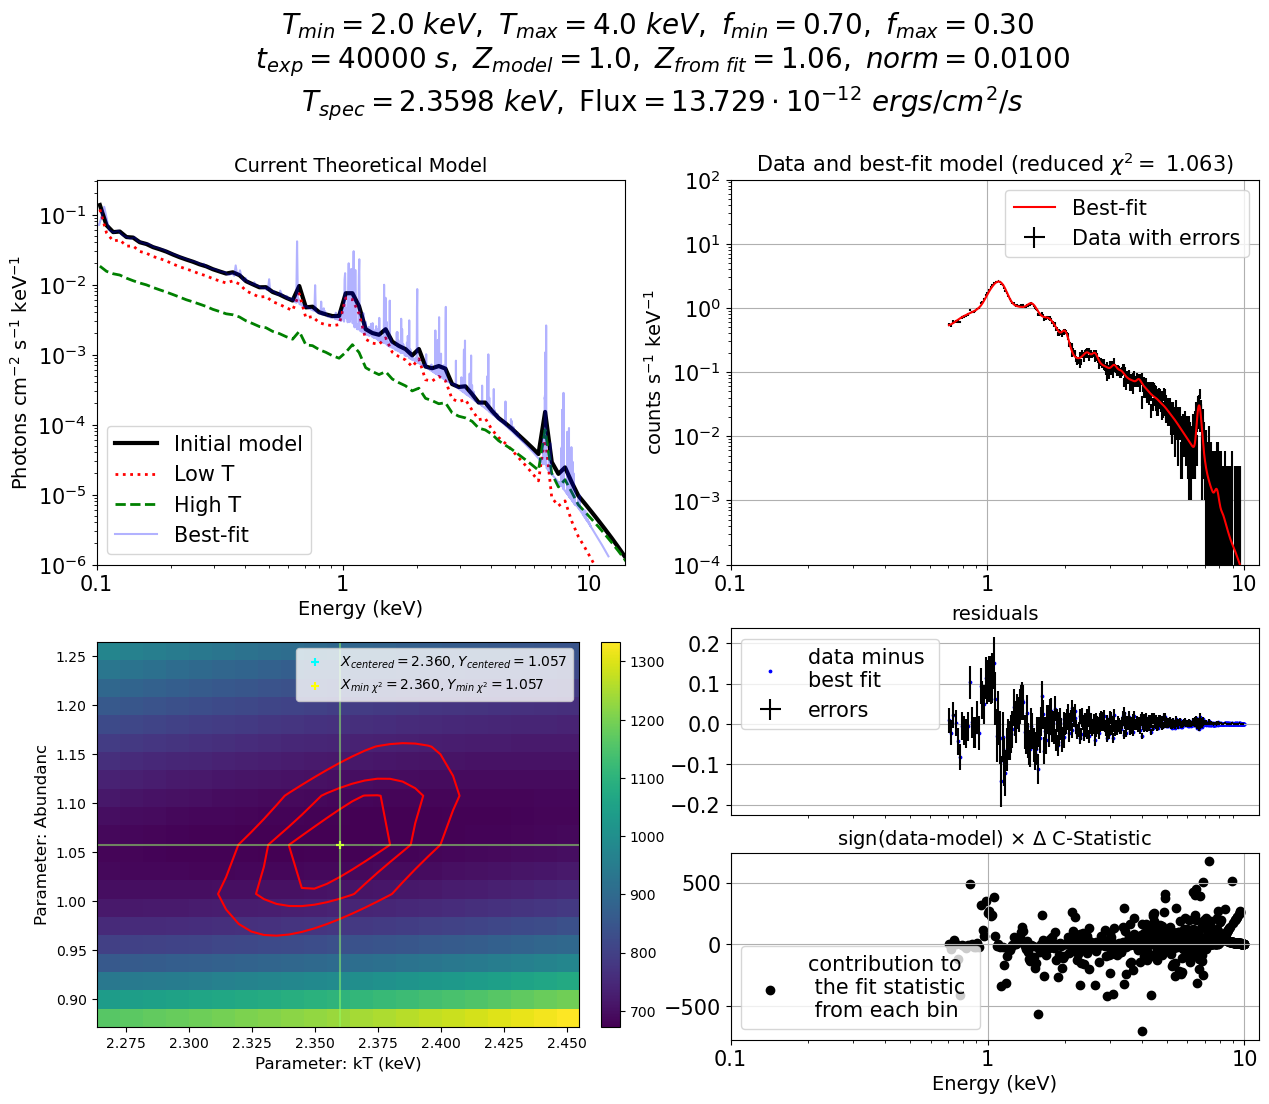

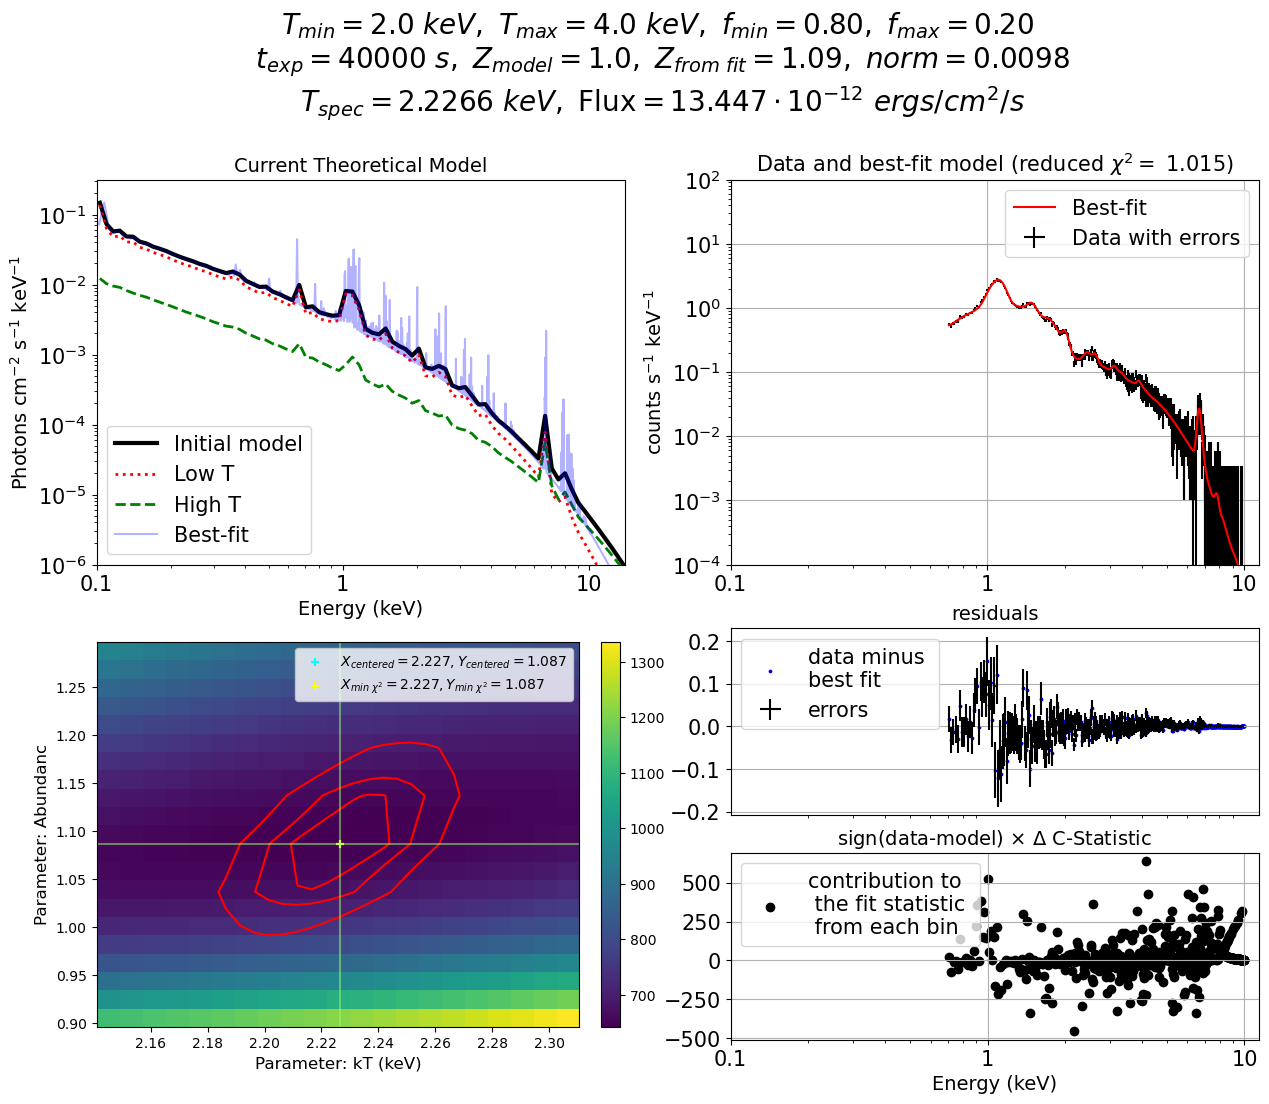

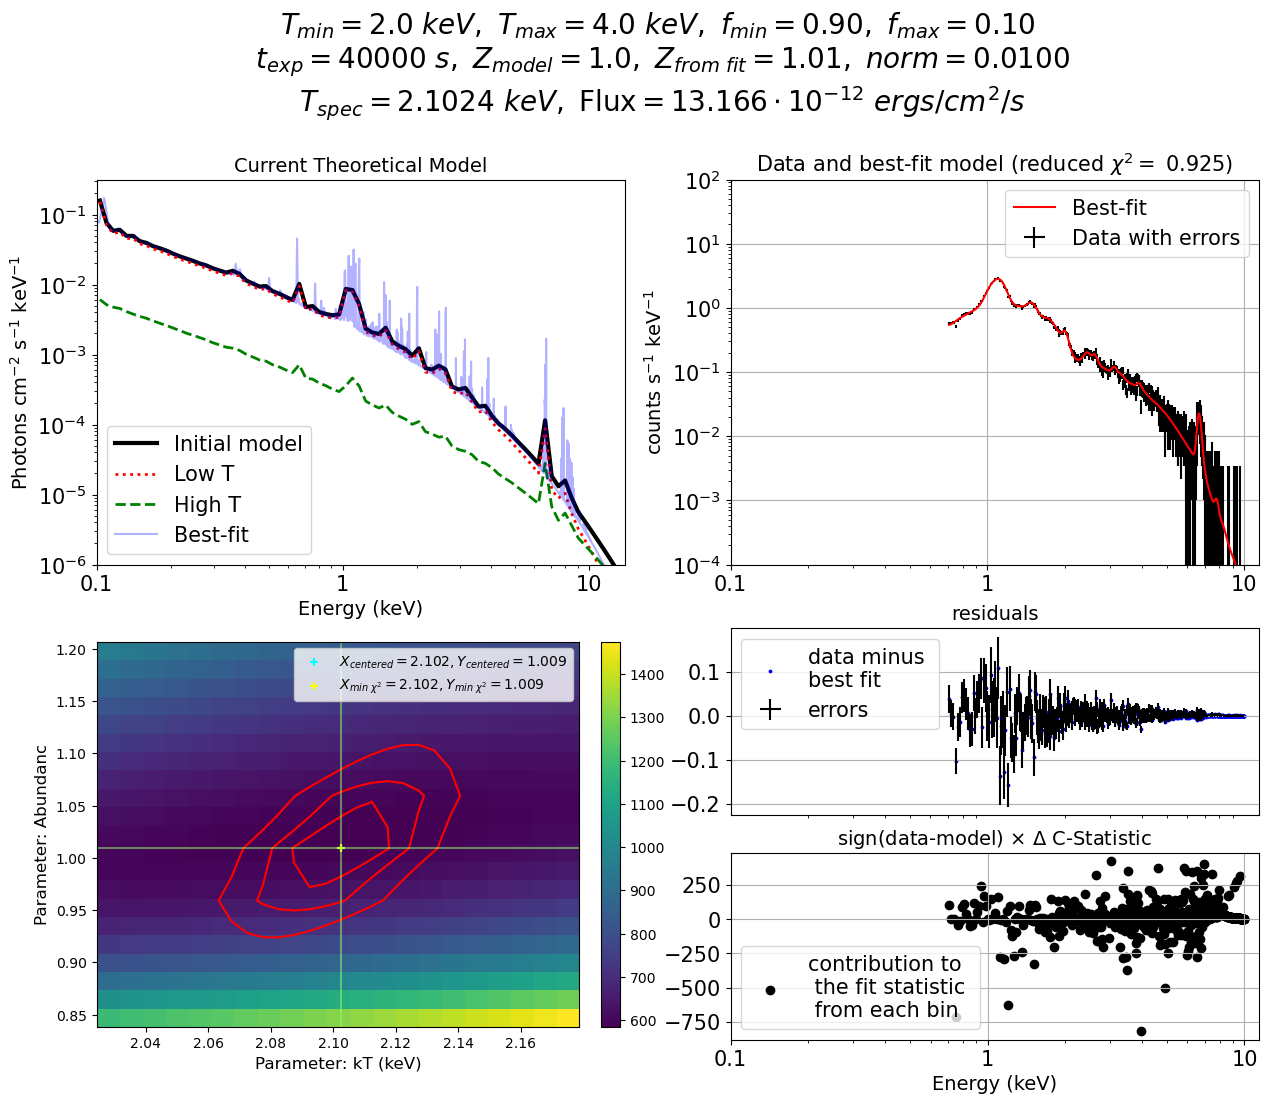

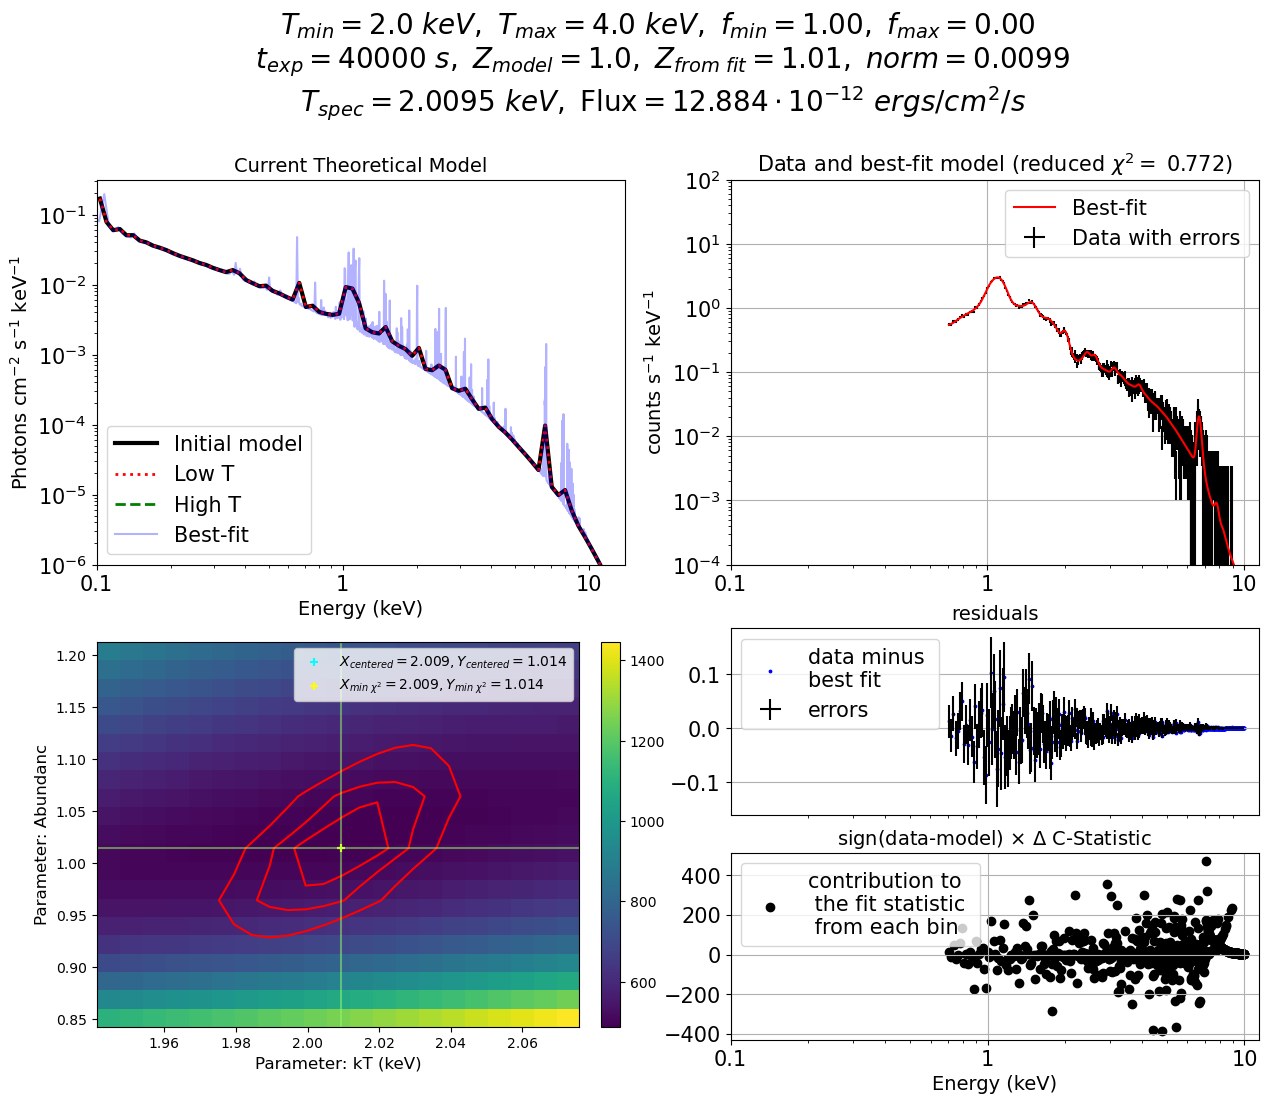

T:  [4.042796281531143, 3.6787210799456984, 3.3975798941859505, 3.0726639381137986, 2.8411791162571216, 2.682358472934289, 2.4990838599663547, 2.35982231551331, 2.2265640557602917, 2.1024316217467547, 2.0094729751522022]
F:  [1.5699725956721928e-11, 1.5418174570083607e-11, 1.513662411922189e-11, 1.485507282857845e-11, 1.457352228172183e-11, 1.4291970799088628e-11, 1.4010420168323266e-11, 1.3728868769598806e-11, 1.3447317904889302e-11, 1.3165766389192768e-11, 1.288421564145533e-11]
[]


In [66]:
logFile = x.Xset.openLog("newLogFile.txt")

%run -i 'utils/fit_reals.py'
    
aaa, aaa1, dt1_lft, dt1_rght = single_T_realistic(2.0, 4.0, 11, 1.0, 
                                                  'Chandra/ACIS-OLD', 
                                                  nrm=0.01, 
                                                  texp=40000, 
                                                  stpar=True, 
                                                  plot=True, 
                                                  Xplot=False)
print("T: ", aaa)
print("F: ", aaa1)
print([(a, b) for a, b in zip(dt1_lft, dt1_rght)])

In [43]:
%run -i 'utils/tspec_norm.py'

temps, temps_spec, temps_diff, dts = calc_Tspec_norm(N_temps=10, 
                                                     T_low=1.0, 
                                                     T_high=8.0, 
                                                     norms=(1, 0.1, 0.01),
                                                     mode='realistic', 
                                                     tlscp='Chandra/ACIS-OLD')

norm = 1: done
norm = 0.1: done
norm = 0.01: done


<Figure size 640x480 with 0 Axes>

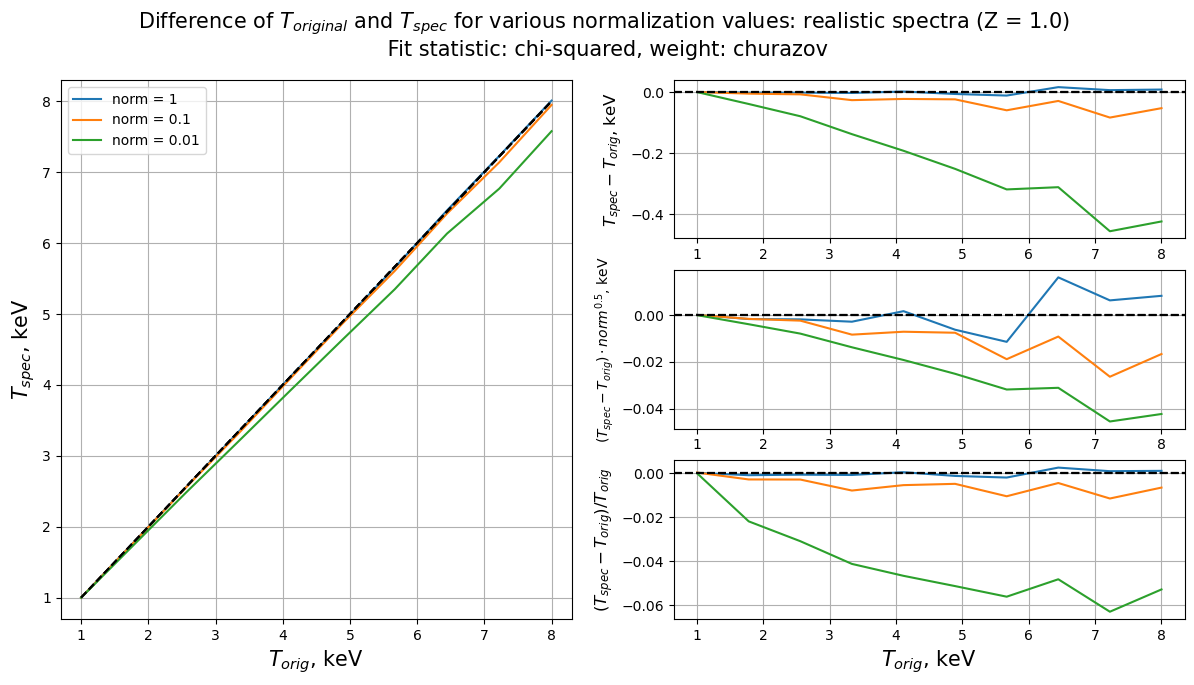

In [44]:
draw_Tspec_norm(temps, temps_spec, temps_diff, dts, 
                mode='realistic spectra (Z = 1.0) \n Fit statistic: chi-squared, weight: churazov')

## 3.2 Figure 5

In [448]:
%run -i 'utils/fit_lines.py'
%run -i 'utils/fit_cont.py'
%run -i 'utils/fit_reals.py'

telescope = 'Chandra/ACIS-OLD' 
#telescope = 'SRG/eROSITA'
#telescope = 'XMM-Newton/MOS'

f_min = np.linspace(0, 1, 11)
T_spec = f_min*0

T_mins = (1.0, 2.0)
T_maxs = (3.0, 6.0)

Tspec_continuum_fit_fig5 = {}
Tspec_cont_all_fig5 = {}
single_T_fit_all_fig5 = {}
Tspec_lines_all_fig5 = {}

exxxpo = 40000
normmmm = 1

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    Tspec_cont_all_fig5[str(T_min)+'-'+str(T_max)] = get_Tspec_continuum_eq46(f_min, T_min, T_max, 0.875, telescope)
    
    Tsum_real = np.zeros(len(f_min))
    Tsum_cont = np.zeros(len(f_min))
    Tsum_lins = np.zeros(len(f_min))
        
    N_trials = 2
    #for i in range(0, N_trials):
    #    Tsum += single_T_fit_continuum(T_min, T_max, len(f_min), telescope, normmmm, exxxpo, stpar=False, plot=False, Xplot=False)[0]
    #Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)] = Tsum/N_trials
    
    if T_min == 1.0:
        for i in range(0, N_trials):
            Tsum_real += single_T_realistic(T_min, T_max, len(f_min), 0.1, telescope, normmmm, exxxpo, stpar=False, plot=False, Xplot=False)[0]
            Tsum_cont += single_T_fit_lines(T_min, T_max, len(f_min), 0.1, telescope, normmmm, exxxpo, stpar=False, plot=False, Xplot=False)[0]
            Tsum_lins += single_T_fit_continuum(T_min, T_max, len(f_min),  telescope, normmmm, exxxpo, stpar=False, plot=False, Xplot=False)[0]
          
        single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)] =    Tsum_real/N_trials
        Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)] =     Tsum_cont/N_trials
        Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)] = Tsum_lins/N_trials
    
    if T_min == 2.0:
        for i in range(0, N_trials):
            Tsum_real += single_T_realistic(T_min, T_max, len(f_min), 0.3, telescope, normmmm, exxxpo, stpar=False, plot=False, Xplot=False)[0]
            Tsum_cont += single_T_fit_lines(T_min, T_max, len(f_min), 0.1, telescope, normmmm, exxxpo, stpar=False, plot=False, Xplot=False)[0]
            Tsum_lins += single_T_fit_continuum(T_min, T_max, len(f_min),  telescope, normmmm, exxxpo, stpar=False, plot=False, Xplot=False)[0]
          
        single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)] =    Tsum_real/N_trials
        Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)] =     Tsum_cont/N_trials
        Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)] = Tsum_lins/N_trials
    
    print(str(T_min)+'-'+str(T_max)+": done")
    
def print_values(TSPEC_LISTS):
    
    for item in TSPEC_LISTS:
   
        for key in item.keys():
            print(key, 'keV')
            print([f'{vl:.2f}' for vl in item[key]], '\n')
            
#print_values([Tspec_cont_all_fig5, single_T_fit_all_fig5])

1.0-3.0: done
2.0-6.0: done


<Figure size 640x480 with 0 Axes>

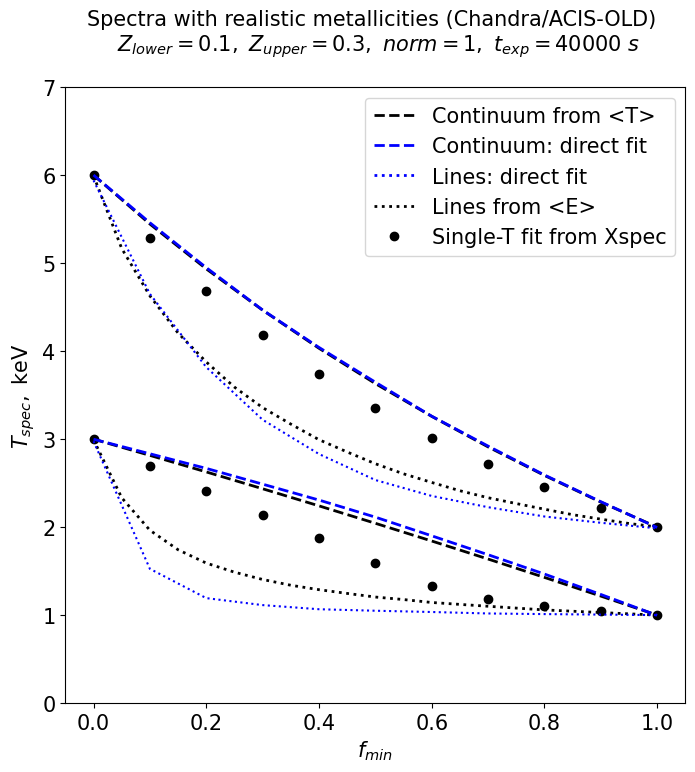

In [449]:
plt.figure(figsize=(8,8))

telescope = 'Chandra/ACIS-OLD' 
#telescope = 'SRG/eROSITA'
f_min = np.linspace(0, 1, 11)
T_mins = (1.0, 2.0)
T_maxs = (3.0, 6.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # line-dominated from <E>
    plot_Tspec_fmin(T_min, T_max, 20, get_data("stats449.dat", show_table=False), naive=False, lstyle=':', cline='black')
    #Tspec_list3 = f_min*0
    #for i in range(0, len(f_min)):
    #    Tspec_list3[i] = get_Tspec_lines(f_min[i], T_min, T_max, get_data("data/stats_12.dat", show_table=False))
    #plt.plot(f_min, Tspec_list3, linestyle=':', color='black')
    
    # line-dominated from direct fit
    Tspec_list4 = Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list4, linestyle=':', color='blue')
    
    # continuum from eq. 4,6
    Tspec_list1 = Tspec_cont_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')
    
    # continuum from direct fit
    Tspec_list5 = Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list5, linestyle = '--', linewidth = 2, color = 'blue')
    
    # realistic metallicities
    Tspec_list2 = single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.scatter(f_min, Tspec_list2, color='black')
    #Tspec_list = Tspec_cont_all[str(T_min)+'-'+str(T_max)]
    #plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black')
    #plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1) 
    
handles, labels = plt.gca().get_legend_handles_labels()
line_n = Line2D([], [], label='Continuum from <T>', color='black', linestyle='--', linewidth=2)
line_e = Line2D([], [], label='Lines from <E>', color='black', linestyle=':', linewidth=2)
line_n1 = Line2D([], [], label='Continuum: direct fit', color='blue', linestyle='--', linewidth=2)
line_e1 = Line2D([], [], label='Lines: direct fit', color='blue', linestyle=':', linewidth=2)
dots_f = Line2D([], [], label='Single-T fit from Xspec', color='black', marker='.', linestyle='None', markersize=12)
handles.extend([line_n, line_n1, line_e1, line_e, dots_f]) # 
plt.legend(handles=handles, fontsize=15)
    
plt.ylim(0, 7)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('$f_{min}$', fontsize = 15)
plt.ylabel('$T_{spec},$ keV', fontsize = 15)
plt.title(f'Spectra with realistic metallicities ('+telescope+f') \n $Z_{{lower}} = 0.1, \ Z_{{upper}} = 0.3, \ norm = {normmmm}, \ t_{{exp}}={exxxpo} \ s$ \n', fontsize = 15)
#plt.savefig(f'Fig5_{telescope[:7]}.png')
plt.show()

# Finally, x($f_{line}$)

Figure 6.

In [490]:
%run -i 'utils/fit_lines.py'
%run -i 'utils/fit_cont.py'
%run -i 'utils/fit_reals.py'

telescope = 'Chandra/ACIS-OLD' 
#telescope = 'SRG/eROSITA'
#telescope = 'XMM-Newton/MOS'

f_min = np.linspace(0, 1, 11)

T_mins = (0.5, 1., 2., 3., 0.5, 1., 2., 3., 0.5, 1., 2., 3.)
T_maxs = (1. , 2., 4., 6., 1.5, 3., 6., 9., 2. , 4., 8., 12.)

metallicities = (0.1, 0.3, 1.0)

exxxpo = 40000
normmmm = 1
dosteppar = False

Tspec_lines_f6 = {}
Tspec_cont_f6 = {}
single_T_fit_f6 = {}

Flux_lines_f6 = {}
Flux_cont_f6 = {}
Flux_fit_f6 = {}

print(telescope)

do_average = False
N_trials = 10

if do_average:
    print('usrednenie', N_trials)
else:
    print('bez usredneniya', N_trials)
    
print(normmmm)
print('chi')

for metallicity in metallicities:

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        name = str(metallicity)+': '+str(T_min)+'-'+str(T_max)
        
        if do_average:
        
            #Tsum_lins = np.zeros(len(f_min))
            Tsum_real = np.zeros(len(f_min))
            #Tsum_cont = np.zeros(len(f_min))

            #Fsum_lins = np.zeros(len(f_min))        
            Fsum_real = np.zeros(len(f_min))
            #Fsum_cont = np.zeros(len(f_min))

            for i in range(0, N_trials):
                
                #Tsum_lins1, Fsum_lins1, _, _ = single_T_fit_lines(T_min, T_max, len(f_min), 5,   telescope, normmmm, exxxpo, stpar=False, plot=False, Xplot=False)
                Tsum_real1, Fsum_real1, _, _ = single_T_realistic(T_min, T_max, len(f_min), metallicity, telescope, normmmm, exxxpo, stpar=False, plot=False, Xplot=False)
                #Tsum_cont1, Fsum_cont1, _, _ = single_T_fit_continuum(T_min, T_max, len(f_min),          telescope, normmmm, exxxpo, stpar=False, plot=False, Xplot=False)

                #Tsum_lins += Tsum_lins1
                Tsum_real += Tsum_real1
                #Tsum_cont += Tsum_cont1
                #Fsum_lins += Fsum_lins1
                Fsum_real += Fsum_real1
                #Fsum_cont += Fsum_cont1

            #Tspec_lines_f6[name],  Flux_lines_f6[name] = Tsum_lins/N_trials, Fsum_lins/N_trials
            single_T_fit_f6[name], Flux_fit_f6[name] =   Tsum_real/N_trials, Fsum_real/N_trials
            #Tspec_cont_f6[name],   Flux_cont_f6[name] =  Tsum_cont/N_trials, Fsum_cont/N_trials

        else:
            
            Tspec_cont_f6[name], Flux_cont_f6[name], _, _ = single_T_fit_continuum(T_min, T_max, len(f_min),              telescope, normmmm, exxxpo, stpar=dosteppar, plot=False, Xplot=False)
            single_T_fit_f6[name], Flux_fit_f6[name], _, _ =    single_T_realistic(T_min, T_max, len(f_min), metallicity, telescope, normmmm, exxxpo, stpar=dosteppar, plot=False, Xplot=False)
            #Tspec_lines_f6[name], Flux_lines_f6[name], _, _ =   single_T_fit_lines(T_min, T_max, len(f_min), metallicity, telescope, normmmm, exxxpo, stpar=dosteppar, plot=False, Xplot=False)
           
        # Tspec_cont_f6[name] = get_Tspec_continuum_eq46(f_min, T_min, T_max, 0.875, telescope)
            
        print(name + ' done')
        
        #plt.plot(f_min, Tspec_cont_f6[name], linestyle = '--', linewidth = 2, color = 'blue')
        #plt.scatter(f_min, single_T_fit_f6[name], color='black')
        #plt.plot(f_min, Tspec_lines_f6[name], linestyle=':', color='blue')
        #plt.show()
        
#print_values([Flux_lines_f6, Flux_cont_f6, Flux_fit_f6])
#print_values([Tspec_lines_f6, Tspec_cont_f6, single_T_fit_f6])

Chandra/ACIS-OLD
bez usredneniya 10
1
chi
0.1: 0.5-1.0 done
0.1: 1.0-2.0 done
0.1: 2.0-4.0 done
0.1: 3.0-6.0 done
0.1: 0.5-1.5 done
0.1: 1.0-3.0 done
0.1: 2.0-6.0 done
0.1: 3.0-9.0 done
0.1: 0.5-2.0 done
0.1: 1.0-4.0 done
0.1: 2.0-8.0 done
0.1: 3.0-12.0 done
0.3: 0.5-1.0 done
0.3: 1.0-2.0 done
0.3: 2.0-4.0 done
0.3: 3.0-6.0 done
0.3: 0.5-1.5 done
0.3: 1.0-3.0 done
0.3: 2.0-6.0 done
0.3: 3.0-9.0 done
0.3: 0.5-2.0 done
0.3: 1.0-4.0 done
0.3: 2.0-8.0 done
0.3: 3.0-12.0 done
1.0: 0.5-1.0 done
1.0: 1.0-2.0 done
1.0: 2.0-4.0 done
1.0: 3.0-6.0 done
1.0: 0.5-1.5 done
1.0: 1.0-3.0 done
1.0: 2.0-6.0 done
1.0: 3.0-9.0 done
1.0: 0.5-2.0 done
1.0: 1.0-4.0 done
1.0: 2.0-8.0 done
1.0: 3.0-12.0 done


<Figure size 640x480 with 0 Axes>

#### Saving results for future revision:

In [43]:
cols = ['$Z$', '$T_{min}$','$T_{max}$','$f_{min}$','$T_{lines}$','$T_{cont}$','$T_{spec}$','$F_{lines}$','$F_{cont}$','$F_{sum}$']
df = pd.DataFrame([], columns = cols)

for metallicity in metallicities:

    for T_min, T_max in list(zip(T_mins, T_maxs)):
        
        for i in range(0, len(f_min)):

            name = str(metallicity)+': '+str(T_min)+'-'+str(T_max)
            #print(name)
            #print(Tspec_lines_f6[name][1])
            
            df2 = pd.DataFrame([[metallicity, T_min, T_max, f_min[i], Tspec_lines_f6[name][i], Tspec_cont_f6[name][i], single_T_fit_f6[name][i], Flux_lines_f6[name][i], Flux_cont_f6[name][i], Flux_fit_f6[name][i]]], columns = cols, index=None)
            
            df2 = pd.concat([df, df2])
        
            df=df2
            
df
df.to_csv(f'data_fig6/{telescope[:7]}_chi_norm={normmmm}.dat', index=False)

In [44]:
all_data_fig6 = pd.read_csv(f'data_fig6/Chandra_chi_1.dat')
all_data_fig6

$Z$  $T_{min}$  $T_{max}$  $f_{min}$  $T_{lines}$  $T_{cont}$  \
0    0.1        0.5        1.0        0.0     0.998830    0.997128   
1    0.1        0.5        1.0        0.1     0.965380    0.976225   
2    0.1        0.5        1.0        0.2     0.933687    0.947130   
3    0.1        0.5        1.0        0.3     0.893978    0.921743   
4    0.1        0.5        1.0        0.4     0.846947    0.881124   
..   ...        ...        ...        ...          ...         ...   
391  1.0        3.0       12.0        0.6     3.645722    4.959639   
392  1.0        3.0       12.0        0.7     3.438084    4.375666   
393  1.0        3.0       12.0        0.8     3.251938    3.864510   
394  1.0        3.0       12.0        0.9     3.114492    3.403881   
395  1.0        3.0       12.0        1.0     2.992100    2.999657   

     $T_{spec}$   $F_{lines}$    $F_{cont}$     $F_{sum}$  
0      0.998691  2.071485e-10  3.159384e-10  5.228887e-10  
1      0.963613  2.057466e-10  2.949746e-10  5.028551e-10  
2      0.928477  2.046132e-10  2.738029e-10  4.828216e-10  
3      0.884540  2.034970e-10  2.530414e-10  4.627881e-10  
4      0.836134  2.037367e-10  2.317060e-10  4.427545e-10  
..          ...           ...           ...           ...  
391    4.249970  4.292146e-10  1.154107e-09  1.625191e-09  
392    3.855303  4.477098e-10  1.089664e-09  1.571524e-09  
393    3.535906  4.637251e-10  1.027239e-09  1.517857e-09  
394    3.247577  4.824169e-10  9.660236e-10  1.464189e-09  
395    2.995178  5.012434e-10  9.077867e-10  1.410522e-09  

[396 rows x 10 columns]

In [101]:
all_data_fig6.iloc[3,:]['$Z$']

0.1

In [107]:
for i in range(0, all_data_fig6.shape[0]):
    
    cr = all_data_fig6.iloc[i,:]
    
    naaame = str(cr['$Z$'])+': '+str(cr['$T_{min}$'])+'-'+str(cr['$T_{max}$'])
    
    #print(naaame)

In [60]:
for metallicity in metallicities:

    for T_min, T_max in list(zip(T_mins, T_maxs)):
        
        for i in range(0, len(f_min)):

            name = str(metallicity)+': '+str(T_min)+'-'+str(T_max)
            
            Tspec_lines_f6[name], 
            Tspec_cont_f6[name], 
            single_T_fit_f6[name], 
            Flux_lines_f6[name], 
            Flux_cont_f6[name], 
            Flux_fit_f6[name]

0      0.1
1      0.1
2      0.1
3      0.1
4      0.1
      ... 
391    1.0
392    1.0
393    1.0
394    1.0
395    1.0
Name: $Z$, Length: 396, dtype: float64


In [80]:
def universal_function(flin, delta1, delta2, beta):
     
    return np.exp( -(flin/delta1)**(2*beta) ) * np.exp( -(flin/delta2)**(8) )

### Plotting

<Figure size 640x480 with 0 Axes>

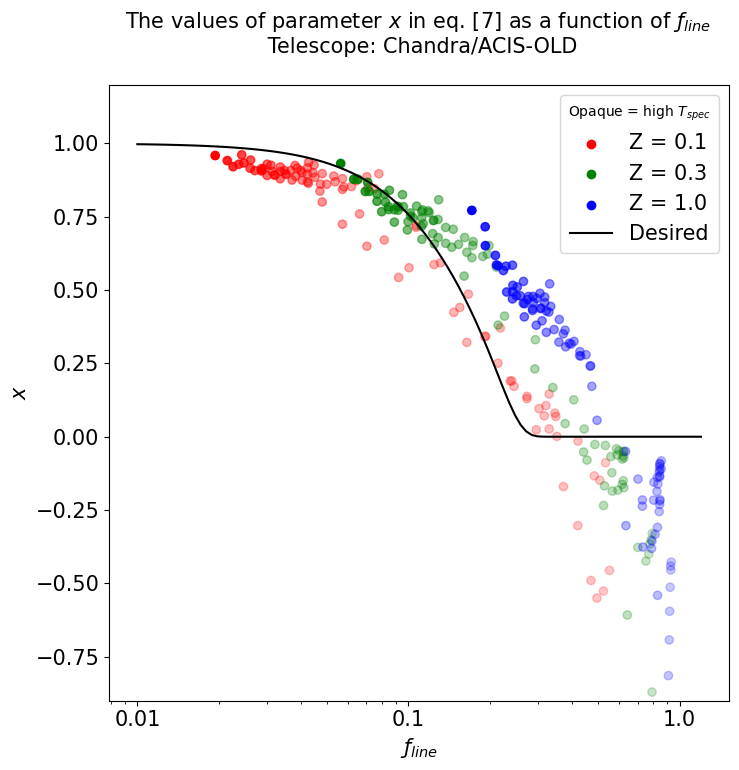

In [499]:
%run -i 'utils/ave_lines.py'
%run -i 'utils/avt_cont.py'

def f_line(telescope_name, temperature, mode, abundance):
    
    c__T = c_T(telescope_name, temperature, mode)
    l__T = l_T(telescope_name, temperature, mode)
    
    return l__T*abundance / (l__T*abundance + c__T)


iks_all = []
fline_all = []
tspec_all = []

Tspec_list3 = np.zeros(len(f_min))

for metallicity in metallicities:

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        name_key = str(metallicity)+': '+str(T_min)+'-'+str(T_max)
         
        #Tspec_list1 = Tspec_cont_f6[name_key]  # continuum
        Tspec_list2 = single_T_fit_f6[name_key] # realistic metallicities
        #Tspec_list3 = Tspec_lines_f6[name_key]  # line-dominated
        
        # line-dominated from <E>
        for i in range(0, len(f_min)):
            Tspec_list3[i] = get_Tspec_lines(f_min[i], T_min, T_max, 
                                             get_data("stats449.dat", show_table=False))
        # continuum from eq. 4,6
        Tspec_list1 = Tspec_cont_f6[name_key] #get_Tspec_continuum_eq46(f_min, T_min, T_max, 0.85, telescope)
        #Tspec_cont_f6[name] = get_Tspec_continuum_eq46(f_min, T_min, T_max, 0.875, telescope)
        
        
        num_iks = [tsp - tli for tsp, tli in zip(Tspec_list2, Tspec_list3)]
        denom_iks = [tco - tli for tco, tli in zip(Tspec_list1, Tspec_list3)]
                
        for i in range(0, len(denom_iks)):
            if denom_iks[i] == 0:
                denom_iks[i] = 0.00001
        
        #if 0.0 in denom_iks:
        #    denom_iks[np.index(0.0)] = 0.00001
         
        #denom_iks[np.where(denom_iks == 0.0)] = 0.00002
        
        #print(denom_iks)
        iks = [numx/denomx for numx, denomx in zip(num_iks, denom_iks)]

        Flux_list1 = Flux_cont_f6[name_key] # continuum
        Flux_list2 = Flux_fit_f6[name_key] # realistic metallicities
#        Flux_list3 = Flux_lines_f6[name_key] # line-dominated
        
        #Flux_list2 = [a*metallicity for a in Flux_fit_f6[name_key]] 
        #Flux_list3 = [a*metallicity for a in Flux_lines_f6[name_key]]

        #fline = [Fli/(Fli + Fco) for Fli, Fco in zip(Flux_list3, Flux_list1)]
        
        #fline = [1-Fco/Fsum for Fco, Fsum in zip(Flux_list1, Flux_list2)]
        
        #fline = [1-Fco/(Fco+Fli) for Fco, Fli in zip(Flux_list1, Flux_list3)]
        
        fline = [f_line(telescope, tttt, 'npdot', metallicity) for tttt in Tspec_list2]
        
        iks_all.append(iks[1:-1])
        fline_all.append(fline[1:-1])
        tspec_all.append(Tspec_list2[1:-1])

        a=2
        
        if a==1:
            
            plt.figure(figsize=(17,8))
            plt.suptitle(f'$T_{{min}}={T_min} \ keV, \ T_{{max}}={T_max} \ keV.$ Z = '+str(metallicity)+'\n \n', fontsize = 25)

            plt.subplot(1,2,1)
            # continuum
            plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')
            # realistic metallicities
            plt.scatter(f_min, Tspec_list2)#, color='black')
            # line-dominated
            plt.plot(f_min, Tspec_list3, linestyle=':', color='black')
        
            print('F_cnt + F_lin = F_sum =?= F_fit')
            for i in range(0, len(f_min)):
                print(f'{Flux_list2[i]*10**12:.2f}')
                #print(f'{Flux_list1[i]*10**12:.2f} + {Flux_list3[i]*10**12:.2f} = {Flux_list1[i]*10**12 + Flux_list3[i]*10**12:.2f} =?= {Flux_list2[i]*10**12:.2f} ....... f_line = {fline[i]:.2f}, x = {iks[i]:.2f}')

            handles, labels = plt.gca().get_legend_handles_labels()
            line_n = Line2D([], [], label='Continuum from <T>', color='black', linestyle='--', linewidth=2)
            line_e = Line2D([], [], label='Lines from <E>', color='black', linestyle=':', linewidth=2)
            dots_f = Line2D([], [], label='Single-T fit', color='black', marker='.', linestyle='None', markersize=12)
            handles.extend([line_n, line_e, dots_f])
            plt.legend(handles=handles, fontsize=15)

            #plt.ylim(0, 12.1)
            plt.xticks(size=15)
            plt.yticks(size=15)
            plt.xlabel('$f_{min}$', fontsize = 15)
            plt.ylabel('$T_{spec},$ keV', fontsize = 15)
            plt.title('Spectra with realistic metallicities ('+telescope+')', fontsize = 15)
            #plt.savefig('Fig5_eROSITA.png')

            plt.subplot(1,2,2)
            #plt.plot(f_min, iks, color='red')
            #plt.plot(f_min, fline, color='blue')

            plt.scatter(fline, iks)
            ii = np.linspace(0, 1.2, 101)
            plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')
            plt.xscale('log')
            #plt.ylim(-0.1, 1.2)
            plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
            plt.yticks(size=15)
            plt.xlabel('$ƒ_{line}$', fontsize = 15)
            plt.ylabel('$x$', fontsize = 15)
            #plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
            plt.show()
            
plt.figure(figsize=(8,8))

fline_all = [item for sublist in fline_all for item in sublist]
iks_all = [item for sublist in iks_all for item in sublist]
tspec_all = [item for sublist in tspec_all for item in sublist]

#plt.scatter(fline_all, iks_all, color='black')
tret = int(len(fline_all)/3)
plt.scatter(fline_all[0:tret], iks_all[0:tret],               label = 'Z = 0.1', color='red', alpha = [1-(1-a/np.max(tspec_all[0:tret]))/1.2 for a in tspec_all[0:tret]])
plt.scatter(fline_all[tret:2*tret], iks_all[tret:2*tret],     label = 'Z = 0.3', color='green', alpha = [1-(1-a/np.max(tspec_all[tret:2*tret]))/1.2 for a in tspec_all[tret:2*tret]])
plt.scatter(fline_all[2*tret:3*tret], iks_all[2*tret:3*tret], label = 'Z = 1.0', color='blue', alpha = [1-(1-a/np.max(tspec_all[2*tret:3*tret]))/1.2 for a in tspec_all[2*tret:3*tret]])

#for i in range(0, tret):
#    plt.plot([fline_all[i], fline_all[i+tret], fline_all[i+2*tret]], [iks_all[i], iks_all[i+tret], iks_all[i+2*tret]], color='grey', alpha=0.3)

if telescope == 'Chandra/ACIS-OLD':
    pars_desired = [0.19, 0.25, 1.00]
elif telescope == 'XMM-Newton/MOS':
    pars_desired = [0.19, 0.22, 1.00]

#ii = np.linspace(0, 1.2, 101)
ii = np.logspace(np.log10(0.01), np.log10(1.2), 101)
plt.plot(ii, universal_function(ii, *pars_desired), color='black', linestyle='-', label = 'Desired')

leg = plt.legend(title='Opaque = high $T_{spec}$', fontsize=15)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.xscale('log')
plt.ylim(-0.9, 1.2)
#plt.xlim(0.03, 0.1)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
plt.title('The values of parameter $x$ in eq. [7] as a function of $ƒ_{line}$ \n Telescope: '+telescope+'\n', fontsize = 15)
#plt.savefig('Fig6A_'+telescope[0:7]+'_'+str(normmmm)+'.png')
plt.show()

In [463]:
f_min = np.linspace(0, 1, 11)

T_mins = (0.5, 1., 2., 3., 0.5, 1., 2., 3., 0.5, 1., 2., 3.)
T_maxs = (1. , 2., 4., 6., 1.5, 3., 6., 9., 2. , 4., 8., 12.)

metallicities = (0.1, 0.3, 1.0)

In [464]:
import scipy.optimize
from matplotlib.gridspec import GridSpec

In [475]:
x111 = fline_all
y111 = iks_all
z111 = tspec_all

print(len(x111))
print(len(y111))
print(len(z111))

for j in range(0, len(y111)):
    
    if y111[j] > 1.2 or y111[j] <= -0.1:
        x111[j] = "k"
        y111[j] = "k"
        z111[j] = "k"

x111 = [i for i in x111 if i != "k"]
y111 = [i for i in y111 if i != "k"]
z111 = [i for i in z111 if i != "k"]

print(len(x111))
print(len(y111))
print(len(z111))

324
324
324
240
240
240


In [480]:
#x111 = [item for sublist in fline_all[0:36] for item in sublist]
#y111 = [item for sublist in iks_all[0:36] for item in sublist]

x111 = fline_all
y111 = iks_all
z111 = tspec_all

popt, pcov = scipy.optimize.curve_fit(universal_function, x111, y111, p0=pars_desired)#, bounds=((0, 0.5), (0, 0.5), (0.5, 1.5)))

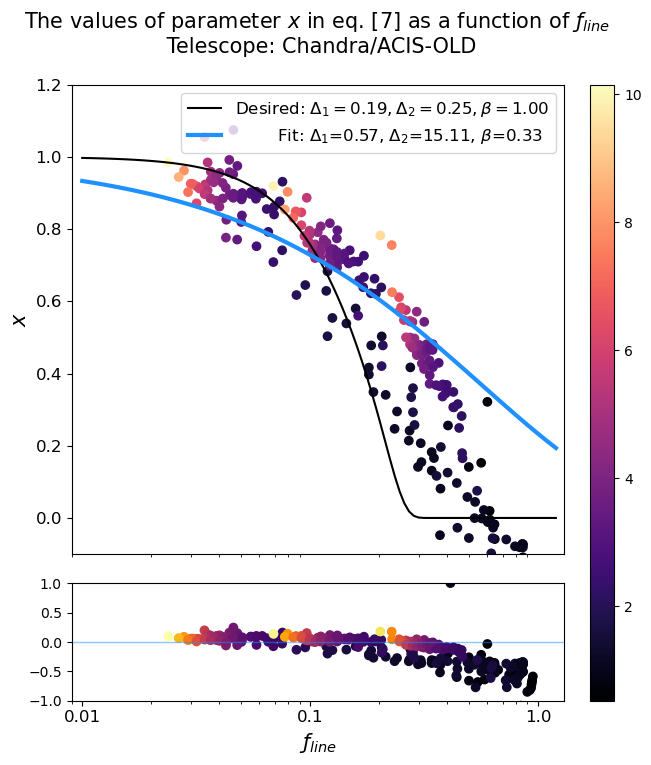

In [481]:
fig = plt.figure(figsize=(7,8))

gs = GridSpec(2, 2, height_ratios=[4, 1], width_ratios=[20, 1], hspace = 0.1, wspace = 0.1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[2])
ax3 = fig.add_subplot(gs[0:2, 1:2])

plot1 = ax1.scatter(x111, y111, c=z111, cmap='magma')#, alpha = [a/np.max(tspec_all) for a in tspec_all])

#ii = np.linspace(0, 1.2, 101)
ii = np.logspace(np.log10(0.01), np.log10(1.2), 101)
ax1.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired: $\Delta_1=0.19, \Delta_2=0.25, \\beta=1.00$')
ax1.plot(ii, universal_function(ii, *popt), color='dodgerblue', linewidth = 3, label='        Fit: $\Delta_1$=%.2f, $\Delta_2$=%.2f, $\\beta$=%.2f' % tuple(popt))

ax1.legend(fontsize=12)
ax1.set_xscale('log')
ax1.set_xlim(0.009, 1.3)
ax1.set_ylim(-0.1, 1.2)
ax1.set_xticks([],[], size=15)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.set_ylabel('$x$', fontsize = 15)

fig.colorbar(mappable=plot1, cax=ax3)

ax2.axhline(0, color='dodgerblue', linewidth = 1, alpha= 0.5)
ax2.scatter(x111, y111-universal_function(x111, *popt), c=z111, cmap='inferno')
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(-1,1)
ax2.set_xscale('log')
ax2.set_xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=12)
ax2.set_xlabel('$ƒ_{line}$', fontsize = 15)

ax1.set_title('The values of parameter $x$ in eq. [7] as a function of $ƒ_{line}$ \n Telescope: '+telescope+'\n', fontsize = 15)

#plt.savefig('Fig6B_'+telescope[0:7]+'_'+str(normmmm)+'.png')

plt.show()

In [267]:
import emcee

def model(params, x):
    d1, d2, b = params
    return np.exp( -(x/d1)**(2*b) ) * np.exp( -(x/d2)**(8) )

def lnlike(params, x, y):
    d1, d2, b = params
    # the likelihood is sum of the lot of normal distributions
    return -0.5 * np.sum( ((y - model(params, x))/1 )**2 )# + np.log(2*np.pi*sigmu**2) )
    
def lnprior(params):
    # The parameters are stored as a vector of values, so unpack them
    d1, d2, b = params
    # Bounds
    if 0.0 < d1 < 0.5 and 0.0 < d2 < 0.5 and 0.5 < b < 1.5:
        return 0.0
    return -np.inf

def lnprob(params, x, y):
    lp = lnprior(params)
    if np.isfinite(lp):
          return lp + lnlike(params, x, y)
    else:
          return -np.inf

In [279]:
x111 = [item for sublist in fline_all[0:24] for item in sublist]
y111 = [item for sublist in iks_all[0:24] for item in sublist]

print(len(x111))
print(len(y111))

for j in range(0, len(y111)):
    
    if y111[j] > 1.2 or y111[j] <= 0:
        x111[j] = "k"
        y111[j] = "k"

x111 = [i for i in x111 if i != "k"]
y111 = [i for i in y111 if i != "k"]

print(len(x111))
print(len(y111))

216
216
192
192


Tspec_lines  Tspec_cont  single_T_fit  Flux_lines  Flux_cont  Flux_fit
0          NaN         NaN           NaN         NaN        NaN       NaN
1          NaN         NaN           NaN         NaN        NaN       NaN
2          NaN         NaN           NaN         NaN        NaN       NaN
3          NaN         NaN           NaN         NaN        NaN       NaN
4          NaN         NaN           NaN         NaN        NaN       NaN
5          NaN         NaN           NaN         NaN        NaN       NaN

In [280]:
#x111 = np.linspace(0, 1.2, 101)
#x111 = np.logspace(np.log10(0.01), np.log10(1.2), 101)
#y111 = universal_function(x111, 0.19, 0.25, 1.00) + np.random.normal(0, 0.4, size=101)
#plt.scatter(x111, y111)
#lt.xscale('log')

In [284]:
#def best_with_emcee(dtTrue, dmTrue, lengthofchain, arguments, draw):

true_delta1, true_delta2, true_beta = 0.25, 0.25, 1.0

nwalkers = 100
initial = [0.5, 0.5, 0.5]
ndim = len(initial)

# make the initial values more noisy
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args = (x111, y111) )

#p0, _, _ = sampler.run_mcmc(p0, 500, progress=True)
#sampler.reset()
lengthofchain = 500
pos,prob,state = sampler.run_mcmc(p0, lengthofchain, progress = False)

/home/aleksei/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


In [285]:
samples = sampler.flatchain
params_best  = samples[np.argmax(sampler.flatlnprobability)]
#randoms = np.random.randint(len(samples), size=50)

#print("Initial dt = {0:.3f}".format(initial[0]))
#print("Initial dm = {0:.3f}".format(initial[1]))
#print("sigmu = {0:.3f}".format(optim.x[2]))

#print('Best dt = {0:.3f}'.format(s[0]))
#print('Best dmu = {0:.3f}'.format(s[1])) 
#print('or best magnification ratio = {0:.3f}'.format(10**(-0.4*s[1])) )


#for params in samples[randoms]:
#  plt.plot(arguments[0], model(params, arguments[0], arguments[2], arguments[3]), color="b", alpha=0.1)

#best_fit_model = model(params_best, arguments[0], arguments[2], arguments[3])

#return params_best[0], params_best[1], samples[randoms]

#best_dt, best_dm, srand = best_with_MCMC(dtTrue=dt_true, 
#                              dmTrue=dm_true, 
#                              lengthofchain=500, 
#                              arguments=(t1_grid, lc1_noise, t2_grid, lc2_noise), 
#                              draw=True)
#print(best_dt, best_dm)
params_best

array([0.23498303, 0.49930648, 0.71244306])

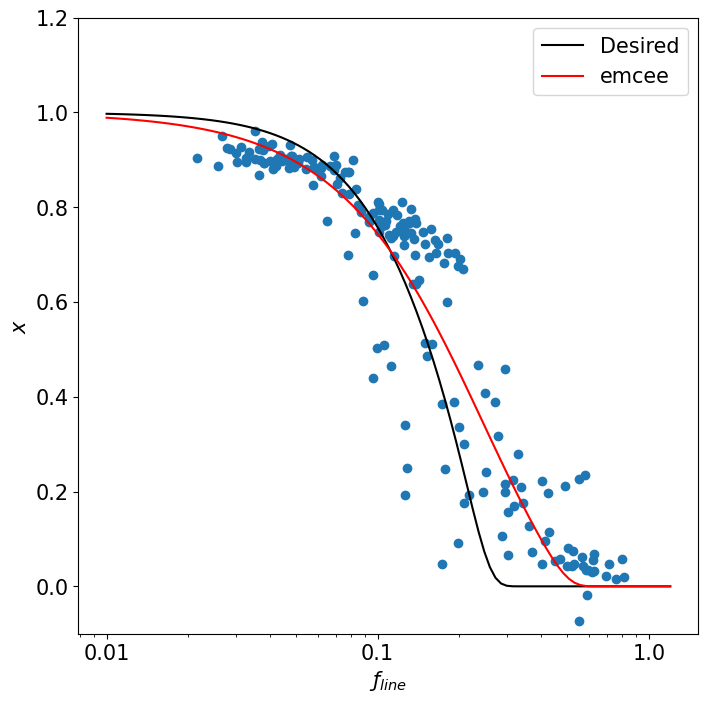

In [329]:
plt.figure(figsize=(8,8))
plt.scatter(x111, y111)

#ii = np.linspace(0, 1.2, 101)
ii = np.logspace(np.log10(0.01), np.log10(1.2), 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')
plt.plot(ii, model(params_best, ii), color='red', linestyle='-', label = 'emcee')

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()

In [ ]:

    #if False:
    #  fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
    #  chain = sampler.get_chain()
    #  labels = ['$\Delta t$', '$\Delta m$', '$\sigma_m$']
    #  for i in range(ndim):
    #      ax = axes[i]
    #      ax.plot(chain[:, :, i], "k", alpha=0.3)
    #      ax.set_xlim(0, len(chain))
    #      ax.set_ylabel(labels[i])
    #      ax.yaxis.set_label_coords(-0.1, 0.5)
    #  axes[-1].set_xlabel("step number")
      #tau = sampler.get_autocorr_time()
      #print(tau)
      #flat_samples = sampler.get_chain()#discard=400, thin=1, flat=False)
      #print(flat_samples.shape)

    #  fig = corner.corner(sampler.flatchain, 
    #                      show_titles=True, 
    #                      labels=['$\Delta t$', '$\Delta m$'], 
    #                      truths=[dt_true, dm_true], 
    #                      scale_hist=True, 
    #                      quantiles=[0.16, 0.5, 0.84])


Some results:

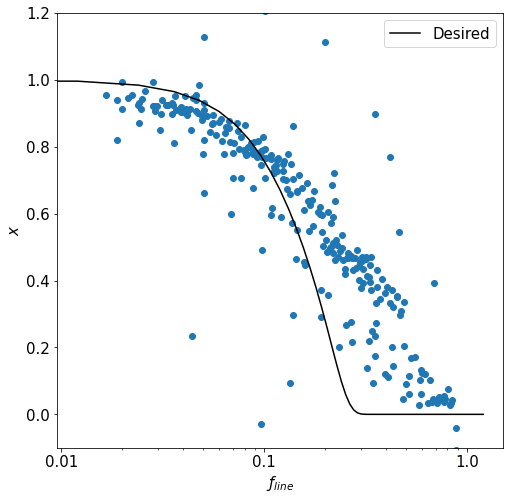

In [154]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra/ACIS' 
#telescope = 'SRG/eROSITA'

iks_all = []
fline_all = []

T_mins = (1., 2., 3., 1., 2., 3., 1., 2., 3.)
T_maxs = (2., 4., 6., 3., 6., 9., 4., 8., 12.)

for metallicity in (0.1, 0.3, 1.0):

    for T_min, T_max in list(zip(T_mins, T_maxs)):
        
        name_key = str(metallicity)+': '+str(T_min)+'-'+str(T_max)

        # continuum
        Tspec_list1 = Tspec_cont_f6[name_key]
        Flux_list1 = Flux_cont_f6[name_key]

        # realistic metallicities
        Tspec_list2 = single_T_fit_f6[name_key]
        Flux_list2 = Flux_fit_f6[name_key]

        #line-dominated
        Tspec_list3 = Tspec_lines_f6[name_key]
        Flux_list3 = Flux_lines_f6[name_key]

        num_iks = [tsp - tli for tsp, tli in zip(Tspec_list2, Tspec_list3)]
        denom_iks = [tco - tli for tco, tli in zip(Tspec_list1, Tspec_list3)]
        iks = [numx/denomx for numx, denomx in zip(num_iks, denom_iks)]

        num_fline = Flux_list3
        denom_fline = Flux_list2 #[Fli + Fco for Fli, Fco in zip(Flux_list3, Flux_list1)]
        fline = [numf/denomf for numf, denomf in zip(num_fline, denom_fline)]

        iks_all.append(iks)
        fline_all.append(fline)

        #plt.scatter(fline, iks)

plt.scatter(fline_all, iks_all)


#plt.scatter(fline_all_1, iks_all_1, label = 'Z = 0.1')
#plt.scatter(fline_all_2, iks_all_2, label = 'Z = 0.3')
#plt.scatter(fline_all_3, iks_all_3, label = 'Z = 1.0')

#for ii in np.linspace(0, 1.2, 101):
ii = np.linspace(0, 1.2, 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')

#handles, labels = plt.gca().get_legend_handles_labels()
#line_n = Line2D([], [], label='Continuum', color='black', linestyle='--', linewidth=2)
#line_e = Line2D([], [], label='Lines', color='black', linestyle=':', linewidth=2)
#dots_f = Line2D([], [], label='Single-T fit from Xspec', color='black', marker='.', linestyle='None', markersize=12)
#handles.extend([line_n, line_e, dots_f])
#plt.legend(handles=handles, fontsize=15)

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()